# P2P Lending Business Credit Risk Anlaysis

In [1]:
# Imporitng all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy_financial as npf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset which is in csv format
df = pd.read_csv("Bondora_raw.csv")

In [3]:
# Viewing the entire imported dataset
pd.set_option('display.max_columns', 120)
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

In [4]:
df.shape

(134529, 112)

In [5]:
# Understanding the statistical data distribution of the numerical columns using describe function.
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,127844.000000,134529.000000,134484.000000,134484.000000,134332.000000,134443.000000,132877.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,1.345290e+05,134529.000000,1.345290e+05,134529.000000,134484.000000,134484.000000,134529.000000,54459.000000,130587.000000,48518.000000,52250.000000,131893.000000,131893.000000,131893.000000,131893.000000,119692.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,77241.000000,131893.000000,4569.000000,12922.000000,71722.00000,134529.000000,134529.000000,59129.000000,59129.000000,134529.000000,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,2727.947540,2543.872472,35.889583,46.151573,119.083443,0.343026,3.680713,-0.109165,0.153716,1.381708,3.357511,437.143384,18.802698,5.682848,2.390005,3.253239,2.359142,43.112825,1.724150e+03,3.181797,5.620270e+02,0.187313,7.769024,122.239119,11.143188,994.558014,708.883798,593.448019,612.733053,0.149255,0.409065,0.136558,0.252434,232.959918,849.838695,1099.982243,2351.471556,1909.285140,336.213893,15.150365,1.473440,4.718408,0.192519,0.186687,952.37584,761.476162,488.397102,24.574728,86.820368,1769.281104,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,2374.439168,2170.128183,26.288644,15.202688,114.737919,3.311925,1.174134,1.555404,1.940581,4.880079,2.844225,1786.569939,150.849487,38.385899,36.791193,77.523767,28.459953,459.081430,4.970166e+03,3.424242,3.383163e+04,0.896455,16.259688,692.480442,7.044104,1654.973527,1276.371901,569.495276,607.882018,0.119853,0.314768,0.075794,0.149629,721.414596,1271.781752,1514.736356,2084.825355,1939.821339,825.994549,177.149905,0.499297,1.883788,0.187765,0.170862,102.71751,1371.557801,827.805133,243.837975,781.437462,2030.546309,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0000

In [6]:
# Defining the Metadata of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [7]:
# Checking for the Data Types of the individual columns.
for i in df.columns:
    print(i,' : ',df[i].dtypes)

ReportAsOfEOD  :  object
LoanId  :  object
LoanNumber  :  int64
ListedOnUTC  :  object
BiddingStartedOn  :  object
BidsPortfolioManager  :  int64
BidsApi  :  int64
BidsManual  :  float64
UserName  :  object
NewCreditCustomer  :  bool
LoanApplicationStartedDate  :  object
LoanDate  :  object
ContractEndDate  :  object
FirstPaymentDate  :  object
MaturityDate_Original  :  object
MaturityDate_Last  :  object
ApplicationSignedHour  :  int64
ApplicationSignedWeekday  :  int64
VerificationType  :  float64
LanguageCode  :  int64
Age  :  int64
DateOfBirth  :  object
Gender  :  float64
Country  :  object
AppliedAmount  :  float64
Amount  :  float64
Interest  :  float64
LoanDuration  :  int64
MonthlyPayment  :  float64
County  :  object
City  :  object
UseOfLoan  :  int64
Education  :  float64
MaritalStatus  :  float64
NrOfDependants  :  object
EmploymentStatus  :  float64
EmploymentDurationCurrentEmployer  :  object
EmploymentPosition  :  object
WorkExperience  :  object
OccupationArea  :  floa

In [8]:
# Checking for the Null Values in the Dataset
for i in df.columns:
    print(i,":", df[i].isnull().sum())

ReportAsOfEOD : 0
LoanId : 0
LoanNumber : 0
ListedOnUTC : 0
BiddingStartedOn : 0
BidsPortfolioManager : 0
BidsApi : 0
BidsManual : 0
UserName : 0
NewCreditCustomer : 0
LoanApplicationStartedDate : 0
LoanDate : 0
ContractEndDate : 75546
FirstPaymentDate : 0
MaturityDate_Original : 0
MaturityDate_Last : 0
ApplicationSignedHour : 0
ApplicationSignedWeekday : 0
VerificationType : 45
LanguageCode : 0
Age : 0
DateOfBirth : 0
Gender : 45
Country : 0
AppliedAmount : 0
Amount : 0
Interest : 0
LoanDuration : 0
MonthlyPayment : 6685
County : 36840
City : 9794
UseOfLoan : 0
Education : 45
MaritalStatus : 45
NrOfDependants : 98929
EmploymentStatus : 197
EmploymentDurationCurrentEmployer : 876
EmploymentPosition : 98439
WorkExperience : 98007
OccupationArea : 86
HomeOwnershipType : 1652
IncomeFromPrincipalEmployer : 0
IncomeFromPension : 0
IncomeFromFamilyAllowance : 0
IncomeFromSocialWelfare : 0
IncomeFromLeavePay : 0
IncomeFromChildSupport : 0
IncomeOther : 0
IncomeTotal : 0
ExistingLiabilities : 

In [9]:
# Checking for the duplicated rows in the dataset 
df.duplicated().sum()

0

Since our dataframe is having zero duplicated rows. We can  go forward with the further Data Preprocesssing.

## Data Preprocessing

In [10]:
# Creating a list of all the unnecessary columns
unnecessary_columns = ['ReportAsOfEOD','LoanId','LoanNumber','ListedOnUTC','UserName','LoanApplicationStartedDate',
                       'ApplicationSignedWeekday','DateOfBirth','IncomeFromPension',
                       'IncomeFromFamilyAllowance','IncomeFromSocialWelfare','IncomeFromLeavePay','IncomeFromChildSupport',
                       'IncomeOther','StageActiveSince']

In [11]:
# Dropping all the unnecessary columns
for i in unnecessary_columns:
    df.drop([i],axis=1,inplace=True)

In [12]:
df.shape

(134529, 97)

In [13]:
# Creating a list of column names which have missing values are more than 40%
columns_with_high_null = []
for i in df.columns:
    if df[i].isnull().sum()>=(134529*(40/100)):
        columns_with_high_null.append(i)
columns_with_high_null.remove("DefaultDate")


# Dropping all the columns which have missing values more than 40% 
for i in columns_with_high_null:
    df.drop([i],axis=1,inplace=True)

In [14]:
columns_with_high_null

['ContractEndDate',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [15]:
# Identifying all the columns having null values and their count
for i in df:
    if df[i].isnull().sum()!=0:
        print(i,' : ',df[i].isnull().sum())

VerificationType  :  45
Gender  :  45
MonthlyPayment  :  6685
County  :  36840
City  :  9794
Education  :  45
MaritalStatus  :  45
EmploymentStatus  :  197
EmploymentDurationCurrentEmployer  :  876
OccupationArea  :  86
HomeOwnershipType  :  1652
DebtToIncome  :  45
FreeCash  :  45
PlannedInterestTillDate  :  3942
LastPaymentOn  :  9531
ExpectedLoss  :  2636
LossGivenDefault  :  2636
ExpectedReturn  :  2636
ProbabilityOfDefault  :  2636
DefaultDate  :  91614
PrincipalOverdueBySchedule  :  14837
ModelVersion  :  2636
Rating  :  2730
WorseLateCategory  :  45456
CreditScoreEsMicroL  :  29574
PreviousRepaymentsBeforeLoan  :  43161
NextPaymentNr  :  36741
NrOfScheduledPayments  :  36741


In [16]:
df.shape

(134529, 62)

In [17]:
#Getting a basic understanding of the status of the loan by taking the value counts of the column
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

### Analysing each Numerical and Categorical column for handling Null values

#### Categorical Columns

In [18]:
# Analysing the Categorical Column County
df['County'].value_counts()

Harju maakond         22224
HARJU                  8108
Tartu maakond          6181
UUSIMAA                6076
Ida-Viru maakond       4197
                      ...  
 POHJOIS-POHJANMAA        1
BRATISLAVSKY              1
KANNUS                    1
PAIJAT-HÄME               1
LAPUA                     1
Name: County, Length: 1010, dtype: int64

In [19]:
# Analysing the Categorical Column City
df['City'].value_counts()

Tallinn           15604
TALLINN            6146
Tartu linn         3326
HELSINKI           3294
Pärnu linn         1986
                  ...  
SÄÄSKÜLA              1
CARRIZAL              1
Voikkaa               1
LUOMA-AHO             1
Tammneeme küla        1
Name: City, Length: 7733, dtype: int64

In [20]:
# Analysing the Categorical Column EmploymentDurationCurrentEmployer
df['EmploymentDurationCurrentEmployer'].value_counts()

MoreThan5Years    52089
UpTo5Years        28411
UpTo1Year         24187
Retiree            7552
UpTo2Years         6498
UpTo3Years         5435
Other              5048
UpTo4Years         3684
TrialPeriod         749
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [21]:
# Analysing the Categorical Column LastPaymentOn
df['LastPaymentOn'].value_counts()

2020-01-13    9148
2020-01-20    5943
2020-01-10    5005
2020-01-15    4732
2020-01-08    4694
              ... 
2014-08-05       1
2011-08-26       1
2011-01-05       1
2013-12-18       1
2016-04-02       1
Name: LastPaymentOn, Length: 2888, dtype: int64

In [22]:
# Analysing the Categorical Column Rating
df['Rating'].value_counts()

E     24461
F     24161
D     21558
C     19845
B     14636
HR    14122
A      6905
AA     6111
Name: Rating, dtype: int64

In [23]:
# Analysing the Categorical Column WorseLateCategory
df['WorseLateCategory'].value_counts()

180+       34789
1-7        23738
31-60       7937
16-30       6790
8-15        6269
61-90       3865
91-120      2062
121-150     1938
151-180     1685
Name: WorseLateCategory, dtype: int64

In [24]:
# Analysing the Categorical Column CreditScoreEsMicroL
df['CreditScoreEsMicroL'].value_counts()

M      92439
M1      4321
M5      2432
M2      1723
M3      1644
M4      1540
M6       560
M8       102
M9        70
M7        69
M10       55
Name: CreditScoreEsMicroL, dtype: int64

In [25]:
# Taking the value counts to understand data distribution
df['EmploymentStatus'].value_counts()

-1.0    97946
 3.0    30060
 5.0     2007
 6.0     1800
 4.0     1303
 2.0     1184
 0.0       32
Name: EmploymentStatus, dtype: int64

In [26]:
# Replacing the -1 category with 1
df['EmploymentStatus']=df['EmploymentStatus'].replace(-1,1)

In [27]:
# Taking the value counts to understand data distribution
df['EmploymentStatus'].value_counts()

1.0    97946
3.0    30060
5.0     2007
6.0     1800
4.0     1303
2.0     1184
0.0       32
Name: EmploymentStatus, dtype: int64

In [28]:
# Understanding the distribution of the data
df['HomeOwnershipType'].value_counts()

 1.0     47334
 3.0     29579
 2.0     20780
 8.0     15457
 10.0     7956
 4.0      4582
 7.0      3337
 6.0      1618
 5.0      1442
 9.0       743
 0.0        46
-1.0         3
Name: HomeOwnershipType, dtype: int64

In [29]:
# Correcting the mistaken category
df['HomeOwnershipType']=df['HomeOwnershipType'].replace(-1,1)

In [30]:
# Understanding the distribution of the data
df['HomeOwnershipType'].value_counts()

1.0     47337
3.0     29579
2.0     20780
8.0     15457
10.0     7956
4.0      4582
7.0      3337
6.0      1618
5.0      1442
9.0       743
0.0        46
Name: HomeOwnershipType, dtype: int64

In [31]:
df['OccupationArea'].value_counts()

-1.0     97997
 1.0      8421
 7.0      3587
 6.0      3312
 3.0      3198
 8.0      2462
 17.0     2424
 9.0      2262
 10.0     1933
 15.0     1684
 16.0     1430
 11.0     1148
 19.0     1000
 14.0      843
 18.0      619
 4.0       587
 13.0      564
 12.0      477
 5.0       362
 2.0       122
 0.0        11
Name: OccupationArea, dtype: int64

In [32]:
# Correcting the mistaken category
df['OccupationArea']=df['OccupationArea'].replace(-1,1)

In [33]:
df['OccupationArea'].value_counts()

1.0     106418
7.0       3587
6.0       3312
3.0       3198
8.0       2462
17.0      2424
9.0       2262
10.0      1933
15.0      1684
16.0      1430
11.0      1148
19.0      1000
14.0       843
18.0       619
4.0        587
13.0       564
12.0       477
5.0        362
2.0        122
0.0         11
Name: OccupationArea, dtype: int64

In [34]:
df['VerificationType'].value_counts()

4.0    74572
1.0    48648
3.0     9428
2.0     1828
0.0        8
Name: VerificationType, dtype: int64

In [35]:
df['Gender'].value_counts()

0.0    85650
1.0    38213
2.0    10621
Name: Gender, dtype: int64

In [36]:
df['Education'].value_counts()

 4.0    51330
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

In [37]:
df['Education']=df['Education'].replace(-1,1)

In [38]:
df['Education'].value_counts()

4.0    51330
5.0    35398
3.0    29260
1.0    12061
2.0     6427
0.0        8
Name: Education, dtype: int64

In [39]:
df['MaritalStatus'].value_counts()

-1.0    97946
 3.0    12400
 1.0    10752
 2.0     9400
 4.0     3377
 5.0      601
 0.0        8
Name: MaritalStatus, dtype: int64

In [40]:
df['MaritalStatus']=df['MaritalStatus'].replace(-1,1)

In [41]:
df['MaritalStatus'].value_counts()

1.0    108698
3.0     12400
2.0      9400
4.0      3377
5.0       601
0.0         8
Name: MaritalStatus, dtype: int64

In [42]:
df['ModelVersion'].value_counts()

6.0    71640
5.0    25822
1.0    12922
2.0     7946
4.0     7861
0.0     4663
3.0     1039
Name: ModelVersion, dtype: int64

In [43]:
# Filling Null Values of the Categorical columns with Mode Imputation
columns_mode = ['VerificationType','Gender','Education','MaritalStatus','OccupationArea','City','County','ModelVersion',
               'EmploymentStatus','EmploymentDurationCurrentEmployer','HomeOwnershipType','Rating','CreditScoreEsMicroL',
               'WorseLateCategory']
mode_imputer = SimpleImputer(strategy='most_frequent')
df[columns_mode]=mode_imputer.fit_transform(df[columns_mode])

#### Numerical Columns

In [44]:
# Taking the value counts of the DebtToIncome column
df['DebtToIncome'].value_counts()

0.00     100177
20.00        29
69.98        23
69.89        23
69.95        22
          ...  
55.92         1
55.65         1
61.00         1
56.57         1
56.10         1
Name: DebtToIncome, Length: 6789, dtype: int64

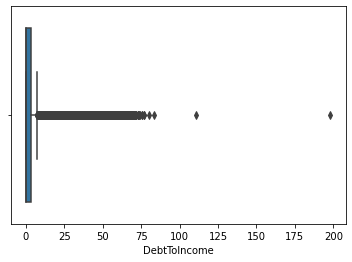

In [45]:
# Checking for outliers in the DebtToIncome column
sns.boxplot(df['DebtToIncome'])
plt.show()

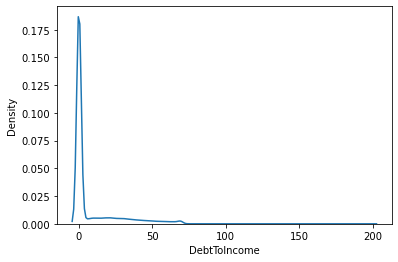

In [46]:
# Plotting a density graph to understand the distibution of the data in the column DebtToIncome
sns.kdeplot(df['DebtToIncome'])
plt.show()

In [47]:
# Checking the value counts of the column
df['FreeCash'].value_counts()

0.00      100174
250.00        40
280.00        31
288.00        30
251.00        29
           ...  
446.99         1
7.42           1
622.29         1
289.88         1
135.01         1
Name: FreeCash, Length: 23658, dtype: int64

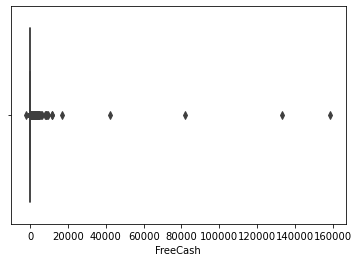

In [48]:
# Checking for outliers with help of boxplot analysis
sns.boxplot(df['FreeCash'])
plt.show()

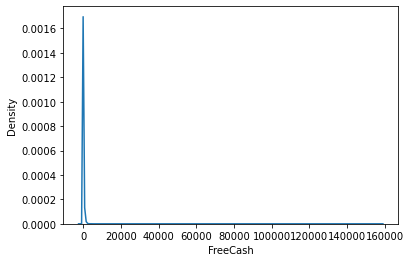

In [49]:
# Plotting a density graph to indentify the distribution of the dataset
sns.kdeplot(df['FreeCash'])
plt.show()

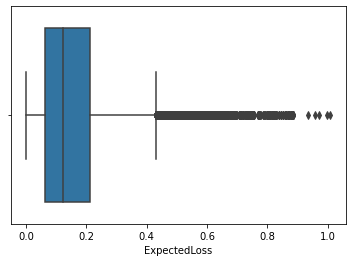

In [50]:
# Plotting boxplot to treating outliers
sns.boxplot(df['ExpectedLoss']) 
plt.show()

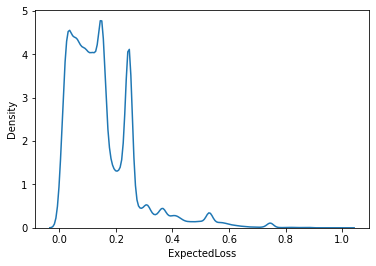

In [51]:
sns.kdeplot(df['ExpectedLoss'])
plt.show()

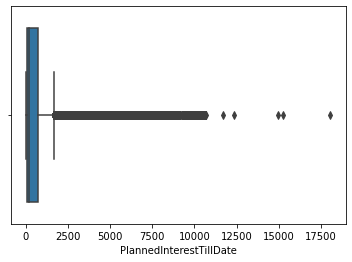

In [52]:
sns.boxplot(df['PlannedInterestTillDate'])
plt.show()

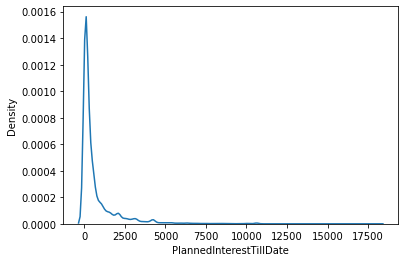

In [53]:
sns.kdeplot(df['PlannedInterestTillDate'])
plt.show()

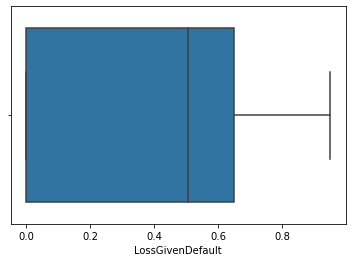

In [54]:
sns.boxplot(df['LossGivenDefault'])
plt.show()

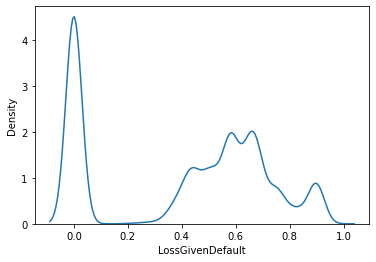

In [55]:
sns.kdeplot(df['LossGivenDefault'])
plt.show()

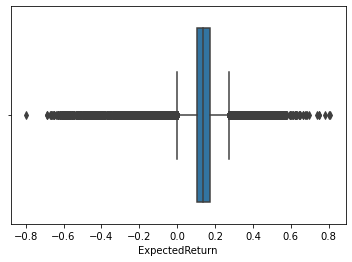

In [56]:
sns.boxplot(df['ExpectedReturn'])
plt.show()

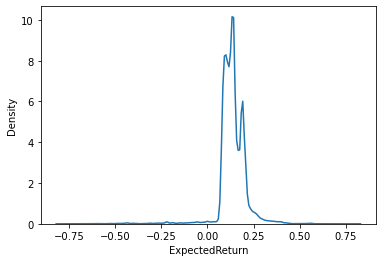

In [57]:
sns.kdeplot(df['ExpectedReturn'])
plt.show()

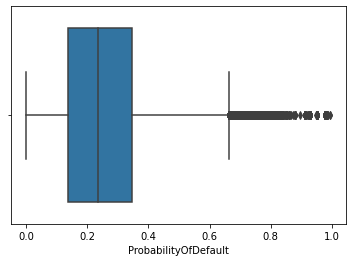

In [58]:
sns.boxplot(df['ProbabilityOfDefault'])
plt.show()

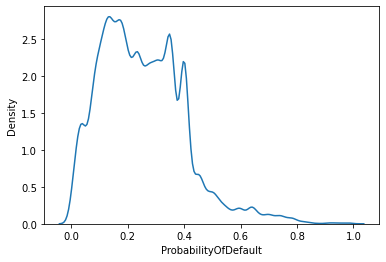

In [59]:
sns.kdeplot(df['ProbabilityOfDefault'])
plt.show()

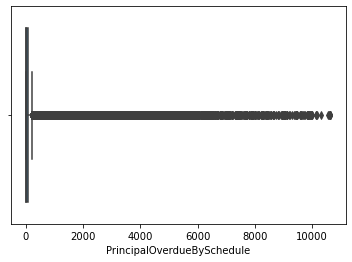

In [60]:
sns.boxplot(df['PrincipalOverdueBySchedule'])
plt.show()

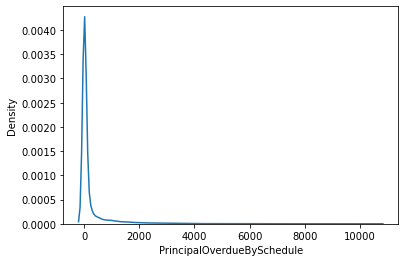

In [61]:
sns.kdeplot(df['PrincipalOverdueBySchedule'])
plt.show()

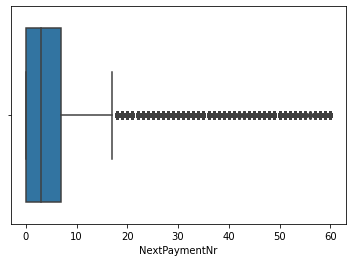

In [62]:
sns.boxplot(df['NextPaymentNr'])
plt.show()

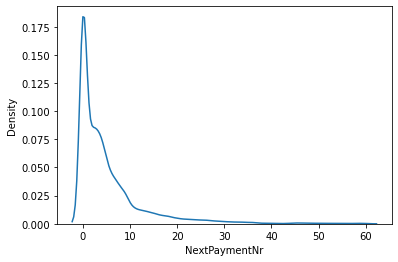

In [63]:
sns.kdeplot(df['NextPaymentNr'])
plt.show()

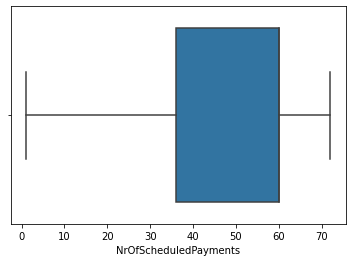

In [64]:
sns.boxplot(df['NrOfScheduledPayments'])
plt.show()

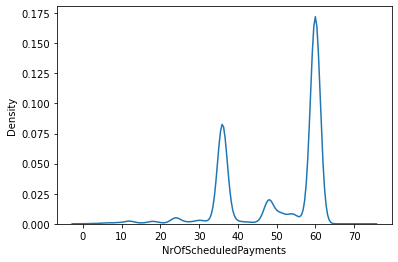

In [65]:
sns.kdeplot(df['NrOfScheduledPayments'])
plt.show()

In [66]:
columns_median = ['PlannedInterestTillDate','ExpectedLoss','LossGivenDefault','ExpectedReturn','ProbabilityOfDefault',
                  'PrincipalOverdueBySchedule','PreviousRepaymentsBeforeLoan','NextPaymentNr','DebtToIncome','FreeCash',
                 'NrOfScheduledPayments']
median_imputer = SimpleImputer(strategy='median')
df[columns_median] = median_imputer.fit_transform(df[columns_median])

In [67]:
df['DefaultDate']=df['DefaultDate'].fillna('Nil')
df['Defaultstatus'] = np.where(df['DefaultDate']!='Nil','Default','Not-Default')
df['Defaultstatus'].value_counts()

Not-Default    91614
Default        42915
Name: Defaultstatus, dtype: int64

In [68]:
df.drop(['DefaultDate'],axis=1,inplace=True)
df.drop(['LastPaymentOn'],axis=1,inplace=True)

In [69]:
df['MonthlyPayment'] = -1*(npf.pmt(df['Interest']/1200,df['LoanDuration'],df['Amount']))

In [70]:
## Legal age to take loan is 18. In our dataset minimum age given 0 and less than 18 which random mistake 
df.loc[df['Age'] < 18, 'Age'] = 18

In [71]:
df_copy = df.copy()

In [72]:
df_1 = df

In [73]:
df_default = df[df['Defaultstatus'] == 'Default']

## Exploratory Data Analysis

In [74]:
df_1

,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus
0,2009-06-11 16:40:39,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,17,2.0,1,61,1.0,EE,319.5582,115.0408,30.00,12,11.214997,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,1.0,6000.0,10500.0,0,0.00,0,0.00,0.00,25,True,319.0800,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,91-120,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,3.0,60.0,Not-Default
1,2009-06-10 15:48:57,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,20,2.0,1,48,1.0,EE,191.7349,140.6057,25.00,1,143.534985,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,1.0,8300.0,10800.0,0,0.00,0,0.00,0.00,15,True,45.8300,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,180+,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,3.0,60.0,Not-Default
2,2009-06-05 19:12:29,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,20,2.0,1,58,1.0,EE,319.5582,319.5409,25.00,20,19.699580,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,1.0,5000.0,7000.0,0,0.00,0,0.00,0.00,25,True,197.2926,0.123398,0.506748,0.134049,0.234140,116.35,6.0,E,Late,True,180+,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,3.0,60.0,Default
3,2009-06-13 12:01:20,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,12,2.0,1,23,1.0,EE,127.8233,57.5205,45.00,15,5.083429,HARJU,PALDISKI,0,2.0,3.0,1.0,UpTo2Years,1.0,1.0,11000.0,11600.0,0,0.00,0,0.00,0.00,15,True,293.1000,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,31-60,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,3.0,60.0,Not-Default
4,2009-06-10 10:17:13,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,10,2.0,1,25,1.0,EE,319.5582,319.5436,30.00,12,31.151388,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,1.0,6800.0,6800.0,0,0.00,0,0.00,0.00,25,True,833.8100,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,180+,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,3.0,60.0,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2015-01-02 16:31:36,2515,0,485.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,16,3.0,4,37,0.0,FI,3000.0000,3000.0000,31.01,60,98.929540,PÄIJÄT-HÄME,LAHTI,0,3.0,3.0,3.0,MoreThan5Years,1.0,5.0,1400.0,1400.0,1,500.00,0,7.69,792.32,1,True,3000.0000,0.146732,0.900000,0.163368,0.125412,0.00,1.0,E,Repaid,False,180+,M,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,3.0,60.0,Default
134525,2015-01-05 16:14:26,1880,0,1120.0000,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,16,3.0,4,35,0.0,FI,3000.0000,3000.0000,18.25,60,76.588868,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,3.0,MoreThan5Years,8.0,1.0,2265.0,2265.0,5,1777.46,0,31.58,520.67,7,True,16.3200,0.053246,0.900000,0.129254,0.045510,0.00,1.0,B,Repaid,False,31-60,M,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,3.0,60.0,Not-Default
134526,2015-01-02 14:04:27,1975,0,525.0000,Tr

In [75]:
df_1['LoanDate'] = pd.to_datetime(df_1['LoanDate'], errors = 'coerce')
df_1['LoanYear'] = pd.DatetimeIndex(df_1['LoanDate']).year
df_default['LoanDate'] = pd.to_datetime(df_default['LoanDate'], errors = 'coerce')
df_default['LoanYear'] = pd.DatetimeIndex(df_default['LoanDate']).year

2019    55836
2018    25103
2017    17933
2016    10514
2015     8046
2014     7455
2020     4405
2013     2510
2010     1157
2009      665
2012      454
2011      451
Name: LoanYear, dtype: int64


2017    9626
2018    9164
2019    7485
2016    6048
2015    4742
2014    4057
2013     877
2010     437
2009     259
2011     125
2012      95
Name: LoanYear, dtype: int64

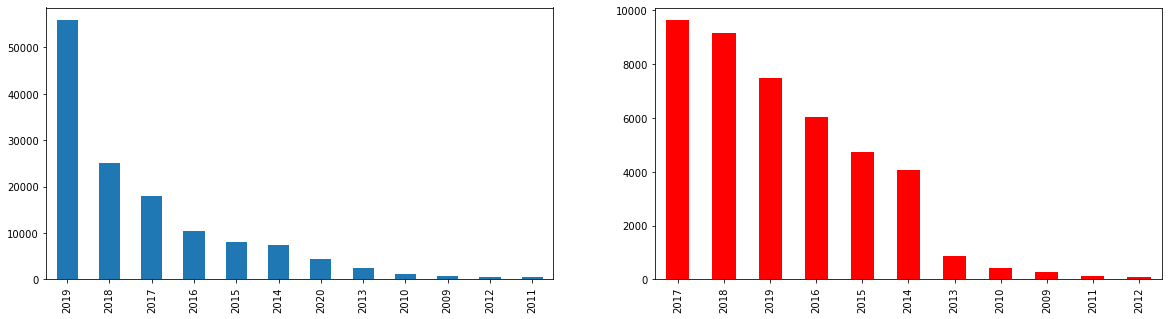

In [76]:
## No. of loans taken in which year
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.LoanYear.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.LoanYear.value_counts().plot(kind = 'bar', color = 'r')
print(df_1.LoanYear.value_counts())  
df_default.LoanYear.value_counts()

- Year by year the borrower are increase, we can see big rise in no. from 2018 to 2019
- In Year 2017, declared maximum no. of loans as default

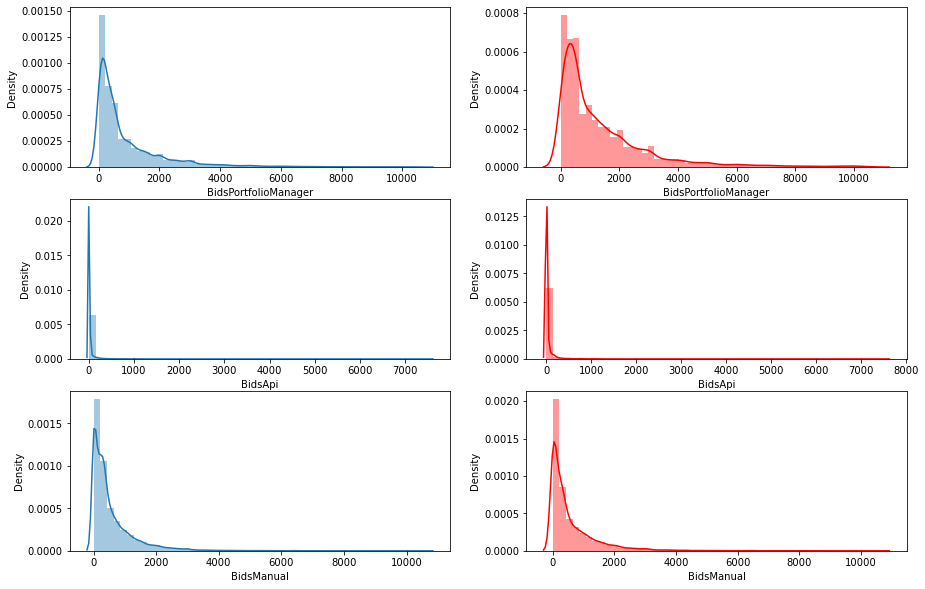

In [77]:
plt.figure(figsize = (15,10))
plt.subplot(3,2,1)
sns.distplot(df_1.BidsPortfolioManager)
plt.subplot(3,2,2)
sns.distplot(df_default.BidsPortfolioManager, color = 'r')
plt.subplot(3,2,3)
sns.distplot(df_1.BidsApi)
plt.subplot(3,2,4)
sns.distplot(df_default.BidsApi, color = 'r')
plt.subplot(3,2,5)
sns.distplot(df_1.BidsManual)
plt.subplot(3,2,6)
sns.distplot(df_default.BidsManual, color = 'r')
plt.show()

- The amount of investment offers made by Portfolio Managers is maximum which is around 966.452876 mean value
- least investment was offered by API

True     77808
False    56721
Name: NewCreditCustomer, dtype: int64


True     28383
False    14532
Name: NewCreditCustomer, dtype: int64

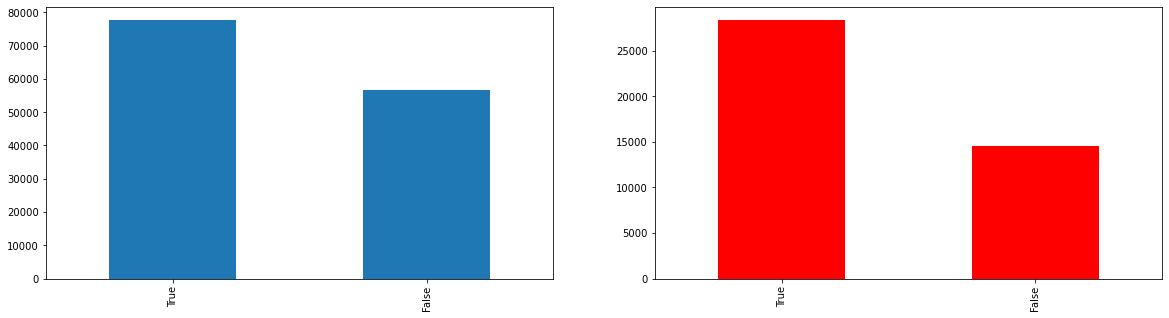

In [78]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.NewCreditCustomer.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.NewCreditCustomer.value_counts().plot(kind = 'bar', color = 'red')
print(df.NewCreditCustomer.value_counts())  
df_default.NewCreditCustomer.value_counts()

- Did the customer have prior credit history in Bondora. we can see 28k people who have default loan had the prior credit histroy

<AxesSubplot:xlabel='Interest', ylabel='Density'>

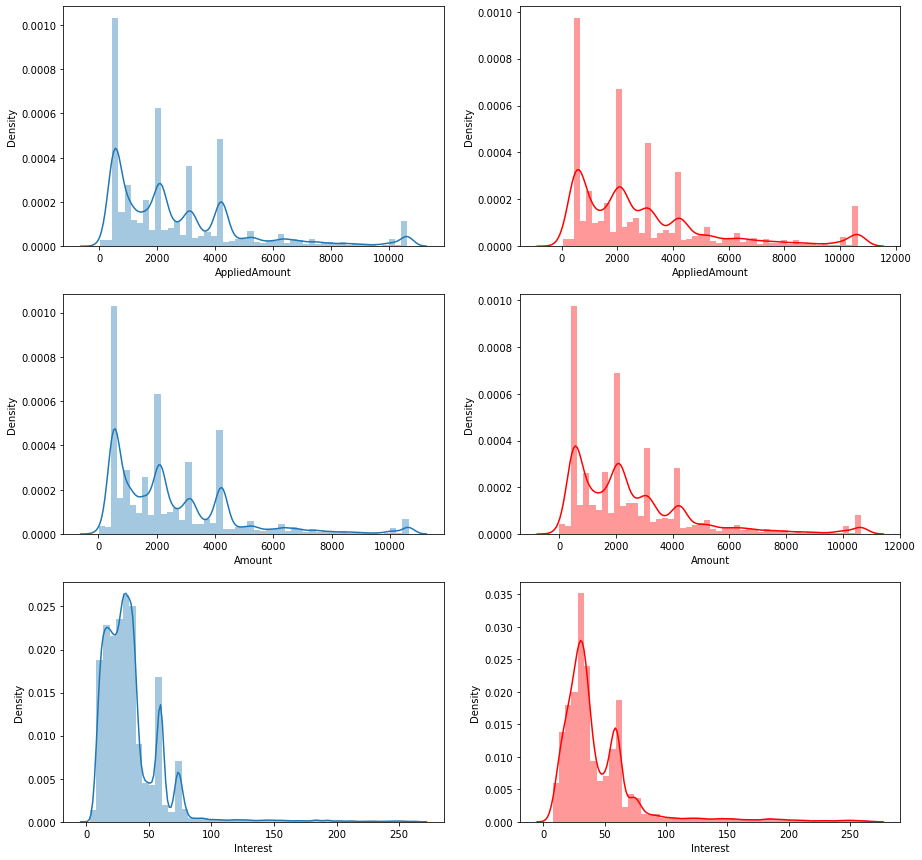

In [79]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.distplot(df_1.AppliedAmount)
plt.subplot(3,2,2)
sns.distplot(df_default.AppliedAmount, color = 'r')
plt.subplot(3,2,3)
sns.distplot(df_1.Amount)
plt.subplot(3,2,4)
sns.distplot(df_default.Amount, color = 'r')
plt.subplot(3,2,5)
sns.distplot(df_1.Interest)
plt.subplot(3,2,6)
sns.distplot(df_default.Interest, color = 'r')

- The overall average interset is around 35.889 and max is 264.31000
- The average interest in case of default loan is around  44.855043 which is greater than the average of overall data.
- Loan to borrower with maximum interest is the default loan

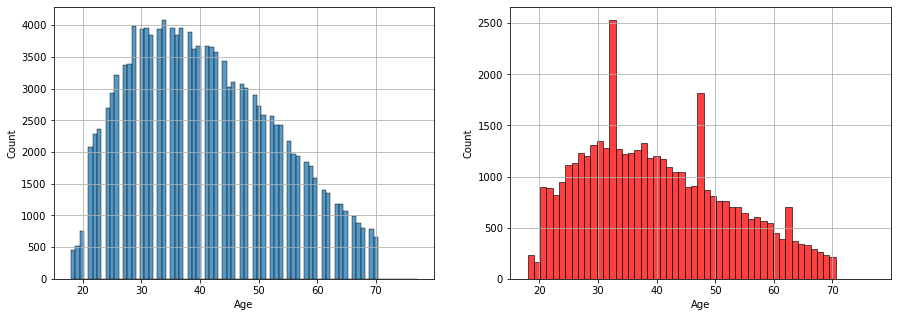

In [80]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df_1.Age)
plt.grid()
plt.subplot(1,2,2)
sns.histplot(df_default.Age, color = 'r')
plt.grid()

EE    77335
FI    32650
ES    24248
SK      296
Name: Country, dtype: int64


EE    18175
FI    13276
ES    11195
SK      269
Name: Country, dtype: int64

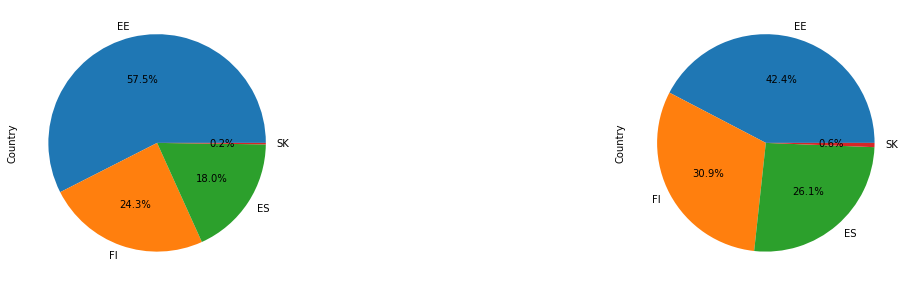

In [81]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.Country.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
df_default.Country.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
print(df_1.Country.value_counts())  
df_default.Country.value_counts()
# from 296 loan from sk country, 269 are the default ones

- SK is the country in which 269 loans aout of 296 are default loan
- other country follows proportionality means with more no. of loan we get more chance of default

In [82]:
## Converting Months into Year
df_1.LoanDuration = df_1.LoanDuration.apply(lambda x: x//12)
df_default.LoanDuration = df_default.LoanDuration.apply(lambda x: x//12)

5    64378
3    45288
4     9533
1     6346
2     6001
0     2983
Name: LoanDuration, dtype: int64


5    20263
3    14308
4     3994
1     1933
2     1714
0      703
Name: LoanDuration, dtype: int64

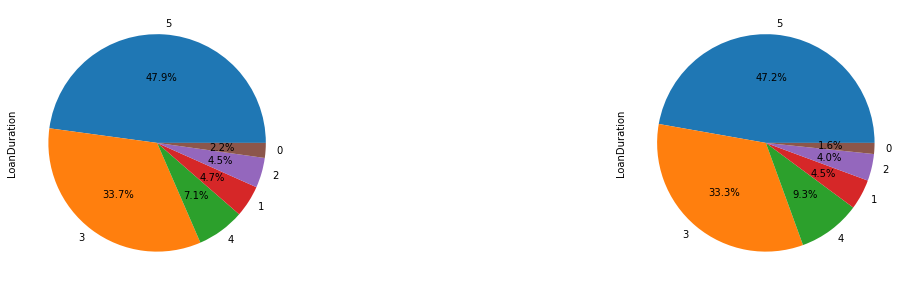

In [83]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.LoanDuration.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
df_default.LoanDuration.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
print(df_1.LoanDuration.value_counts())
df_default.LoanDuration.value_counts()

- we can see almost about 50% of loan were taken for 5 year of duration and about 33% for 3 year.

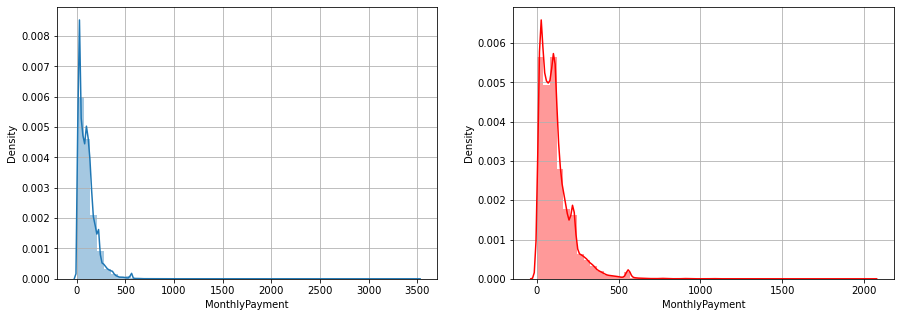

In [84]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df_1.MonthlyPayment)
plt.grid()
plt.subplot(1,2,2)
sns.distplot(df_default.MonthlyPayment, color = 'red')
plt.grid()

- The average monthly payment for default loan is around  135.875499 unit which is greater than the avearage of overall loan data 118.004958

In [85]:
df_1['UseOfLoan'] = df_1['UseOfLoan'].map({ 0: 'Loan consolidation', 1: 'Real estate', 2: 'Home improvement', 3:'Business',
                                       4:'Education', 5:'Travel', 6:'Vehicle', 7:'Other', 8:'Health'})
df_default['UseOfLoan'] = df_default['UseOfLoan'].map({0: 'Loan consolidation', 1: 'Real estate', 2: 'Home improvement', 3:'Business',
                                         4:'Education', 5:'Travel', 6:'Vehicle', 7:'Other', 8:'Health'})


# df_1['UseOfLoan'] = df_1['UseOfLoan'].replace([-1,1],'Real estate')
# df_1['UseOfLoan'] = df_1['UseOfLoan'].replace([0], 'Loan consolidation')
# df_1['UseOfLoan'] = df_1['UseOfLoan'].replace([7,8,9,10], 3)
# df_1['UseOfLoan'] = df_1['UseOfLoan'].replace([11,12,13,14],4)
# df_1['UseOfLoan'] = df_1['UseOfLoan'].replace([15,16,17,18,19],4)


Other                 9698
Home improvement      9191
Loan consolidation    6914
Vehicle               3150
Business              1950
Travel                1787
Health                1519
Education             1366
Real estate            955
Name: UseOfLoan, dtype: int64 97999


(Other                 5445
 Home improvement      4901
 Loan consolidation    3600
 Vehicle               1477
 Business               957
 Travel                 905
 Health                 855
 Education              770
 Real estate            438
 Name: UseOfLoan, dtype: int64,
 23567)

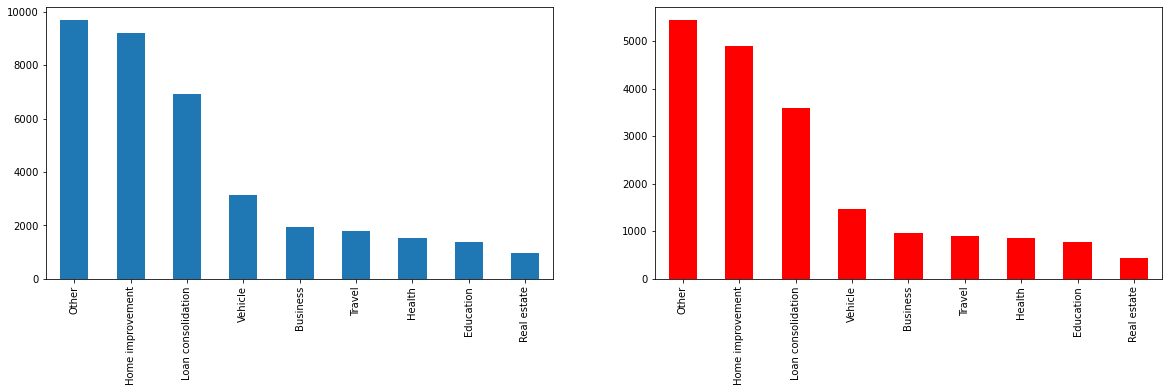

In [86]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.UseOfLoan.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.UseOfLoan.value_counts().plot(kind = 'bar', color = 'red')
print(df_1.UseOfLoan.value_counts(), df_1.UseOfLoan.isnull().sum())  
df_default.UseOfLoan.value_counts(), df_default.UseOfLoan.isnull().sum()

- Home improvement the biggest known reason for which people takes loan

In [87]:
df_1['MaritalStatus'] = df_1['MaritalStatus'].map({1: 'Married', 2: 'Cohabitant', 3:'Single', 4:'Divorced', 5:'Widow'})
df_default['MaritalStatus'] = df_default['MaritalStatus'].map({1: 'Married', 2: 'Cohabitant', 3:'Single', 4:'Divorced', 5:'Widow'})

Married       108743
Single         12400
Cohabitant      9400
Divorced        3377
Widow            601
Name: MaritalStatus, dtype: int64 8


(Married       29210
 Single         7162
 Cohabitant     4331
 Divorced       1890
 Widow           314
 Name: MaritalStatus, dtype: int64,
 8)

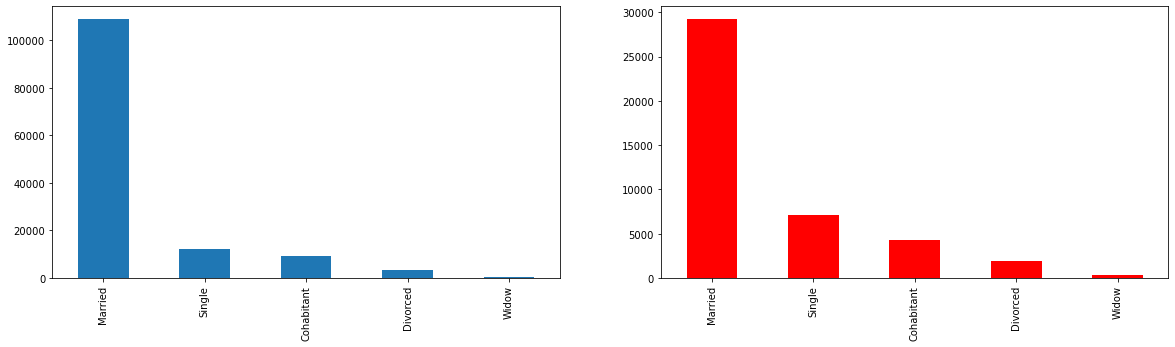

In [88]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.MaritalStatus.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.MaritalStatus.value_counts().plot(kind = 'bar', color = 'red')


print(df_1.MaritalStatus.value_counts(), df_1.MaritalStatus.isnull().sum())  
df_default.MaritalStatus.value_counts(), df_default.MaritalStatus.isnull().sum()

- we can see 'single' prefer bondora the most for finance. for default loan we can say it is proportional to no. of  laon taken. also we gonna drop this feature because high no. of null values.

In [89]:
df_1['EmploymentStatus'] = df_1['EmploymentStatus'].map({1: 'Unemployed', 2: 'Partially employed', 3:'Fully employed', 4:'Self-employed', 5:'Entrepreneur', 6:'Retiree'})
df_default['EmploymentStatus'] = df_default['EmploymentStatus'].map({1: 'Unemployed', 2: 'Partially employed', 3:'Fully employed', 4:'Self-employed', 5:'Entrepreneur', 6:'Retiree'})

Unemployed            98143
Fully employed        30060
Entrepreneur           2007
Retiree                1800
Self-employed          1303
Partially employed     1184
Name: EmploymentStatus, dtype: int64 32


(Unemployed            23620
 Fully employed        15723
 Retiree                1176
 Self-employed           852
 Entrepreneur            811
 Partially employed      706
 Name: EmploymentStatus, dtype: int64,
 27)

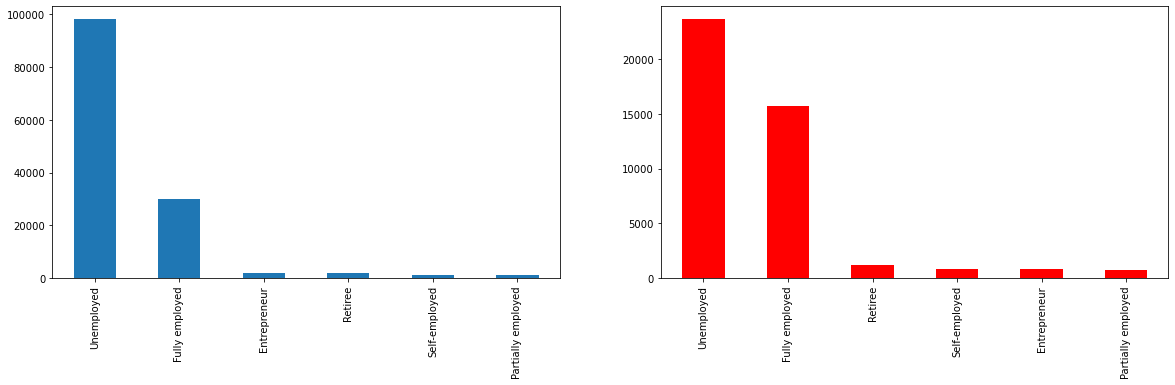

In [90]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.EmploymentStatus.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.EmploymentStatus.value_counts().plot(kind = 'bar',color = 'red')

print(df_1.EmploymentStatus.value_counts(), df_1.EmploymentStatus.isnull().sum())  
df_default.EmploymentStatus.value_counts(), df_default.EmploymentStatus.isnull().sum()

- Bondora is prefered by Fully Employed 

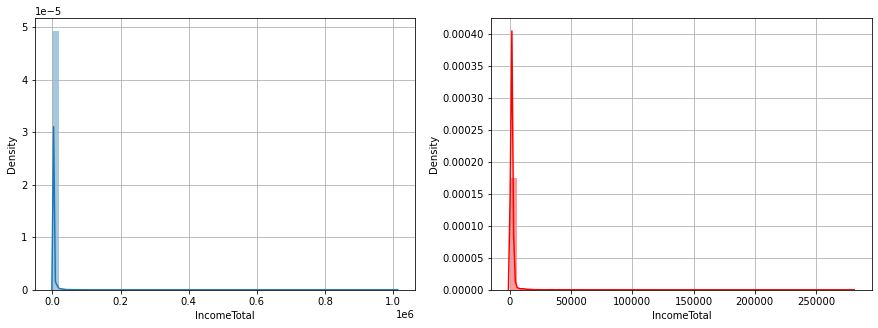

In [91]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df_1.IncomeTotal)
plt.grid()
plt.subplot(1,2,2)
sns.distplot(df_default.IncomeTotal, color = 'red')
plt.grid()

- the average income of loan borrower are 1724
- default loan borrower have average total income of around 1784 with maximim 280000.

In [92]:
df_1['VerificationType'] = df_1['VerificationType'].map({1: 'Income unverified', 2: 'Income unverified, cross-referenced by phone',
                                                     3:'Income verified ', 4:'Income and expenses verified', 0:'Not set'})
df_default['VerificationType'] = df_default['VerificationType'].map({1: 'Income unverified', 2: 'Income unverified, cross-referenced by phone',
                                                       3:'Income verified ', 4:'Income and expenses verified', 0:'Not set'})

Income and expenses verified                    74617
Income unverified                               48648
Income verified                                  9428
Income unverified, cross-referenced by phone     1828
Not set                                             8
Name: VerificationType, dtype: int64


Income and expenses verified                    22163
Income unverified                               14270
Income verified                                  5711
Income unverified, cross-referenced by phone      763
Not set                                             8
Name: VerificationType, dtype: int64

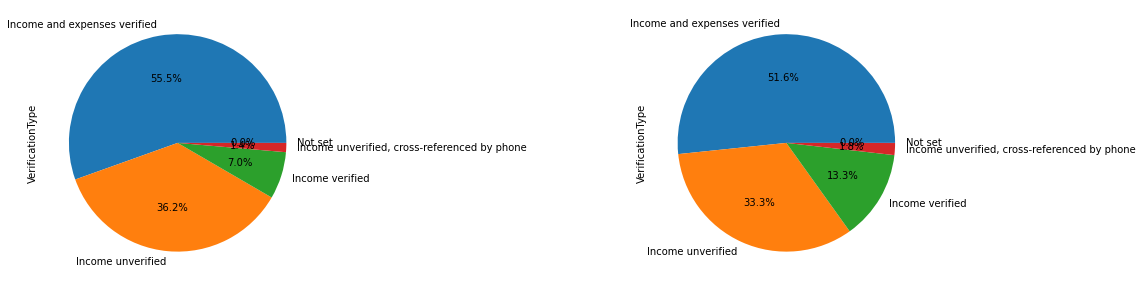

In [93]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.VerificationType.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
df_default.VerificationType.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

print(df_1.VerificationType.value_counts())  
df_default.VerificationType.value_counts()

-  all case of 'not set' are the default loan case
- 'Income and expenses verified' is mostly used for verification

In [94]:
df_1['Gender'] = df_1['Gender'].map({1: 'Woman', 2: 'Undefined', 0:'Male'})
df_default['Gender'] = df_default['Gender'].map({1: 'Woman', 2: 'Undefined', 0:'Male'})

Male         85695
Woman        38213
Undefined    10621
Name: Gender, dtype: int64


Male         28589
Woman        10806
Undefined     3520
Name: Gender, dtype: int64

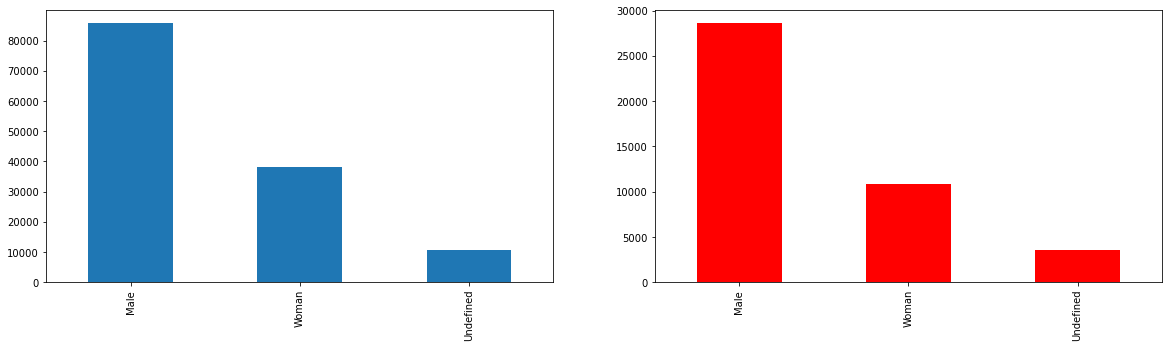

In [95]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.Gender.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.Gender.value_counts().plot(kind = 'bar', color = 'red')


print(df_1.Gender.value_counts())  
df_default.Gender.value_counts()

- most loan borrower are male then female

MoreThan5Years    52965
UpTo5Years        28411
UpTo1Year         24187
Retiree            7552
UpTo2Years         6498
UpTo3Years         5435
Other              5048
UpTo4Years         3684
TrialPeriod         749
Name: EmploymentDurationCurrentEmployer, dtype: int64 0


(MoreThan5Years    16924
 UpTo1Year          7727
 UpTo5Years         7082
 UpTo2Years         3333
 UpTo3Years         2603
 Retiree            2067
 UpTo4Years         1794
 Other              1021
 TrialPeriod         364
 Name: EmploymentDurationCurrentEmployer, dtype: int64,
 0)

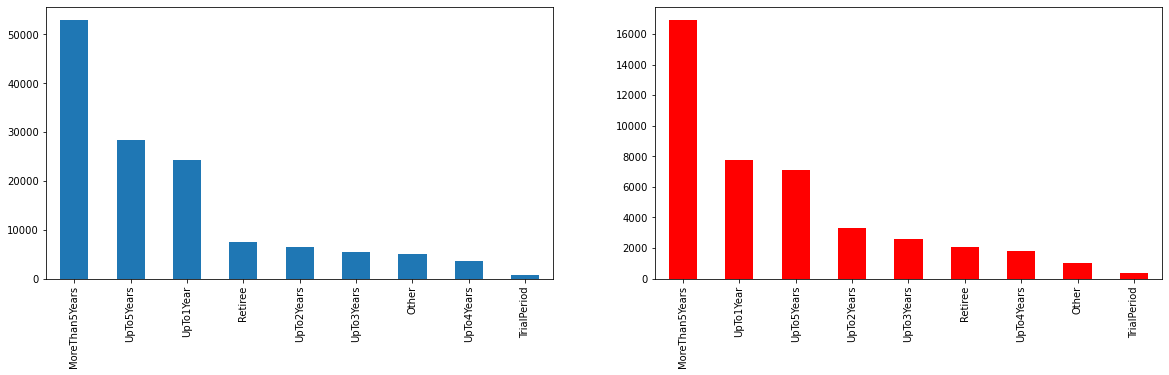

In [96]:
## Employment time with the current employer
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.EmploymentDurationCurrentEmployer.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.EmploymentDurationCurrentEmployer.value_counts().plot(kind = 'bar', color = 'red')
print(df_1.EmploymentDurationCurrentEmployer.value_counts(), df_1.EmploymentDurationCurrentEmployer.isnull().sum())  
df_default.EmploymentDurationCurrentEmployer.value_counts(), df_default.EmploymentDurationCurrentEmployer.isnull().sum()

In [97]:
df_1['HomeOwnershipType'] = df_1['HomeOwnershipType'].map({1: 'Owner', 2: 'Living with parents',3:'Tenant, pre-furnished property',
                                                           4:'Tenant, unfurnished property',  7:'Joint ownership', 8:'Mortgage'})
df_default['HomeOwnershipType'] = df_default['HomeOwnershipType'].map({1: 'Owner', 2: 'Living with parents', 3:'Tenant, pre-furnished property',
                                                         4:'Tenant, unfurnished property',  7:'Joint ownership', 8:'Mortgage'})

Owner                             48989
Tenant, pre-furnished property    29579
Living with parents               20780
Mortgage                          15457
Tenant, unfurnished property       4582
Joint ownership                    3337
Name: HomeOwnershipType, dtype: int64 11805


(Owner                             13689
 Tenant, pre-furnished property     9822
 Living with parents                7484
 Mortgage                           4382
 Tenant, unfurnished property       2724
 Joint ownership                    1373
 Name: HomeOwnershipType, dtype: int64,
 3441)

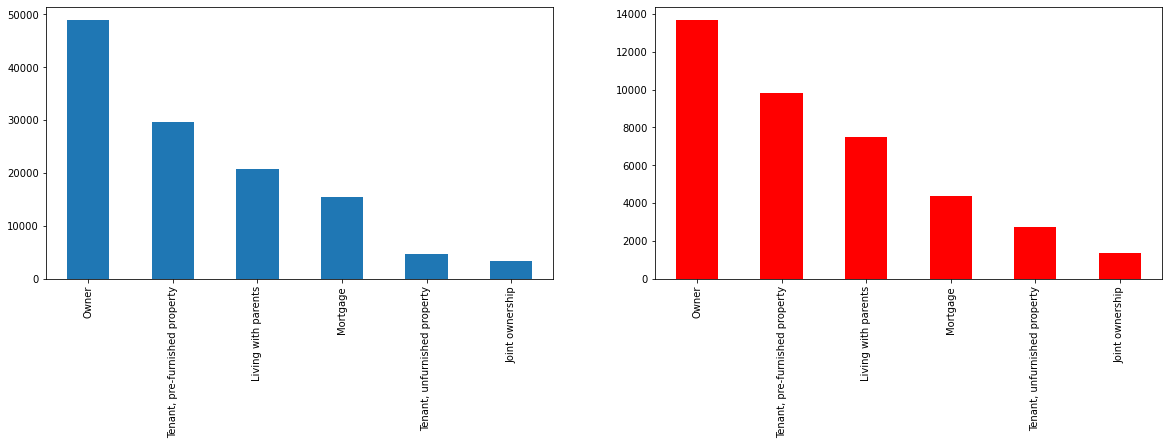

In [98]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.HomeOwnershipType.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.HomeOwnershipType.value_counts().plot(kind = 'bar', color = 'red')
print(df_1.HomeOwnershipType.value_counts(), df_1.HomeOwnershipType.isnull().sum())  
df_default.HomeOwnershipType.value_counts(), df_default.HomeOwnershipType.isnull().sum()

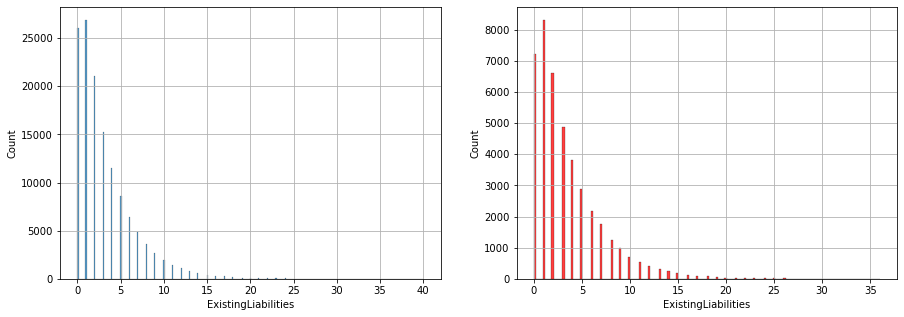

In [99]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df_1.ExistingLiabilities)
plt.grid()
plt.subplot(1,2,2)
sns.histplot(df_default.ExistingLiabilities, color = 'red')
plt.grid()

- we can see most of the people have 0 or 1 Existing Liabilities

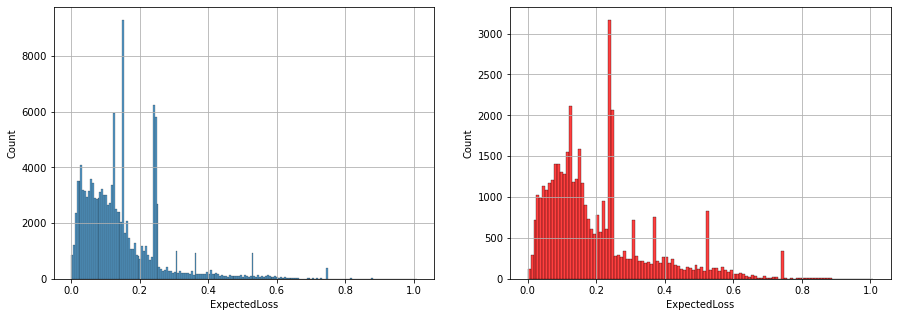

In [100]:
# its the probability of Expected Loss calculated by the current Rating model
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df_1.ExpectedLoss)
plt.grid()
plt.subplot(1,2,2)
sns.histplot(df_default.ExpectedLoss, color = 'red')
plt.grid()

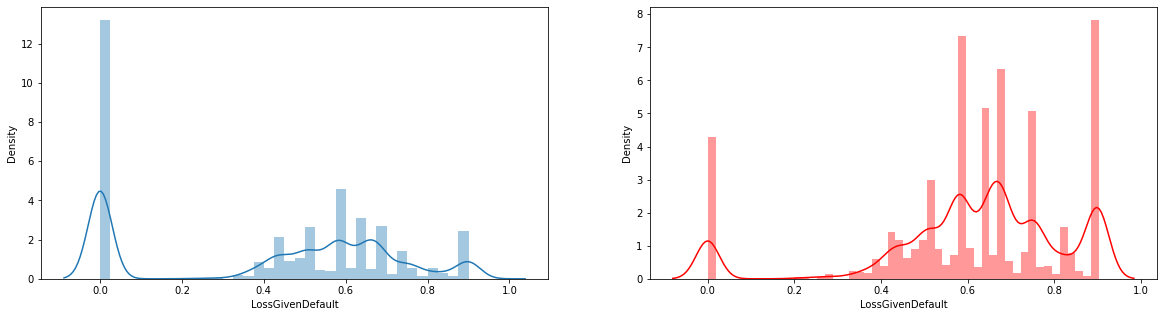

In [101]:
# probabilty of loss which assumed default is actually default loan
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df_1.LossGivenDefault)
plt.subplot(1,2,2)
sns.distplot(df_default.LossGivenDefault, color = 'red')
plt.show()

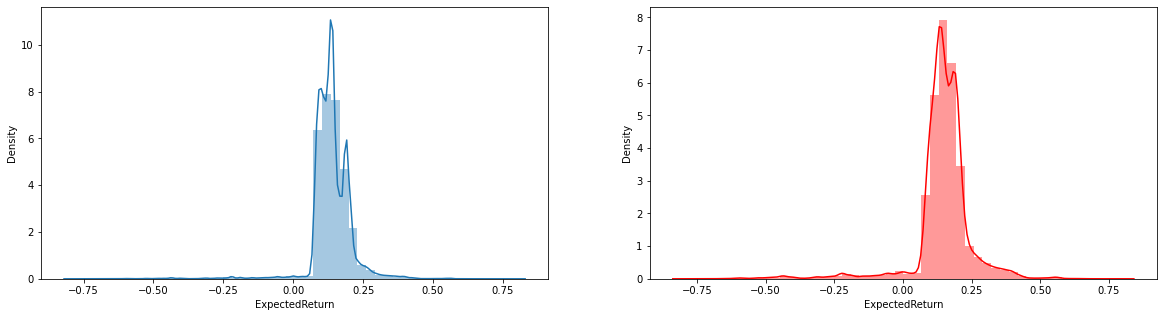

In [102]:
## Expected Return calculated by the current Rating model
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df_1.ExpectedReturn)
plt.subplot(1,2,2)
sns.distplot(df_default.ExpectedReturn, color = 'red')
plt.show()

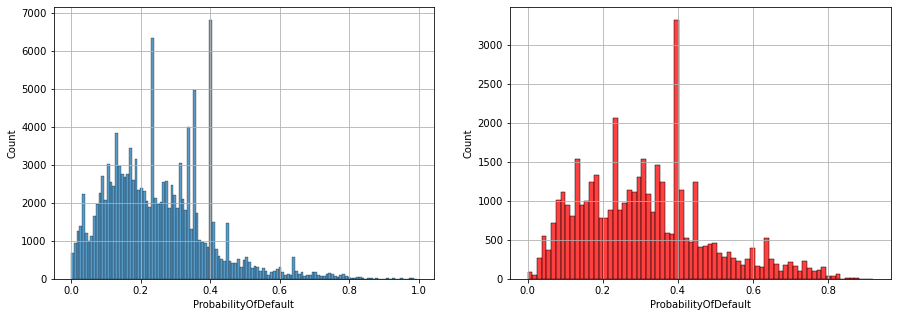

In [103]:
#Probability of Default, refers to a loan’s probability of default within one year horizon
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df_1.ProbabilityOfDefault)
plt.grid()
plt.subplot(1,2,2)
sns.histplot(df_default.ProbabilityOfDefault, color = 'red')
plt.grid()

- in above 2-3 graph we can see that most the default case are not predicted correctly as their chance of default having probability less than 0.5

6.0    74276
5.0    25822
1.0    12922
2.0     7946
4.0     7861
0.0     4663
3.0     1039
Name: ModelVersion, dtype: int64 0


(6.0    12113
 5.0    12001
 1.0     7235
 2.0     4461
 4.0     4252
 0.0     2250
 3.0      603
 Name: ModelVersion, dtype: int64,
 0)

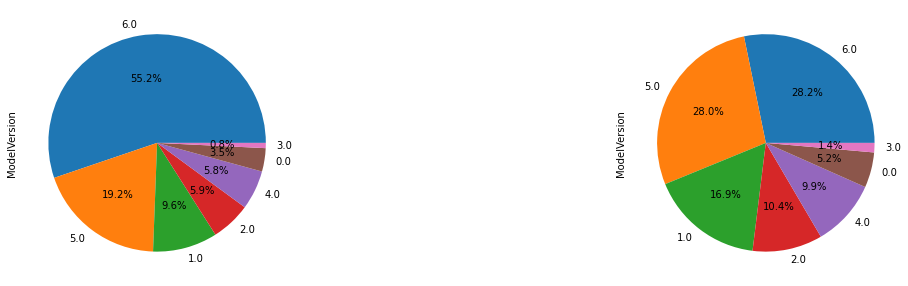

In [104]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.ModelVersion.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
df_default.ModelVersion.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

print(df_1.ModelVersion.value_counts(), df_1.ModelVersion.isnull().sum())  
df_default.ModelVersion.value_counts(), df_default.ModelVersion.isnull().sum()

- we have 7 version till now fron which maximum prediction is done using version 6

E     27191
F     24161
D     21558
C     19845
B     14636
HR    14122
A      6905
AA     6111
Name: Rating, dtype: int64 0


(HR    10088
 F      9401
 E      7563
 D      6333
 C      4990
 B      3030
 A      1003
 AA      507
 Name: Rating, dtype: int64,
 0)

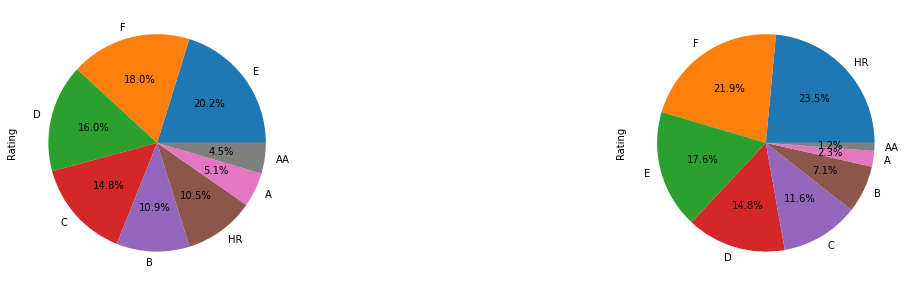

In [105]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.Rating.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.subplot(1,2,2)
df_default.Rating.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

print(df_1.Rating.value_counts(), df_1.Rating.isnull().sum())  
df_default.Rating.value_counts(), df_default.Rating.isnull().sum()

- outof 14122 case of high risk 10088 case are correctly prdicted

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

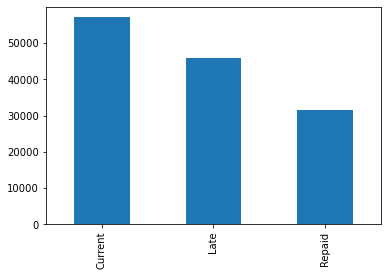

In [106]:
# already we have converted the status feature into 2 category of deafault and not default case
df_1['Status'].value_counts().plot(kind = 'bar')
df_1['Status'].value_counts()

False    106900
True      27629
Name: Restructured, dtype: int64 0


(False    31521
 True     11394
 Name: Restructured, dtype: int64,
 0)

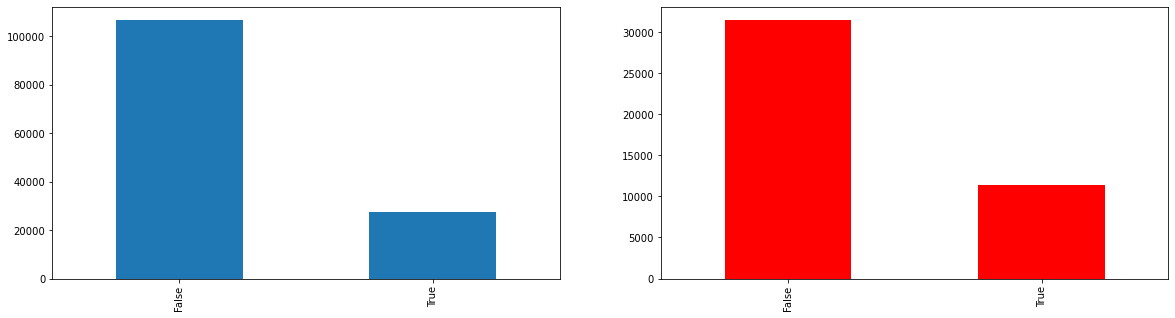

In [107]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.Restructured.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.Restructured.value_counts().plot(kind = 'bar', color = 'red')
print(df_1.Restructured.value_counts(), df_1.Restructured.isnull().sum())  
df_default.Restructured.value_counts(), df_default.Restructured.isnull().sum()

- we can see from 27k cases where loan are restructed but still 11394 fails to completly repaided the loan.

180+       80245
1-7        23738
31-60       7937
16-30       6790
8-15        6269
61-90       3865
91-120      2062
121-150     1938
151-180     1685
Name: WorseLateCategory, dtype: int64 0


(180+       34692
 91-120      1992
 121-150     1905
 151-180     1654
 61-90       1623
 31-60        766
 16-30        189
 8-15          70
 1-7           24
 Name: WorseLateCategory, dtype: int64,
 0)

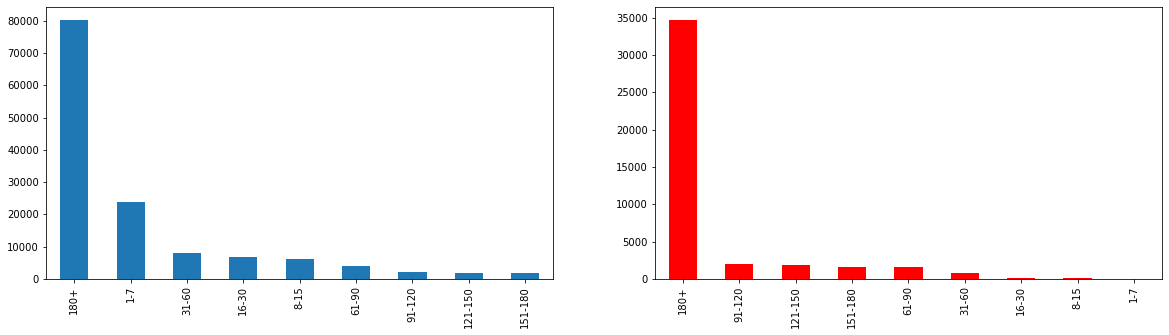

In [108]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.WorseLateCategory.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_default.WorseLateCategory.value_counts().plot(kind = 'bar', color = 'red')
print(df_1.WorseLateCategory.value_counts(), df_1.WorseLateCategory.isnull().sum())  
df_default.WorseLateCategory.value_counts(), df_default.WorseLateCategory.isnull().sum()

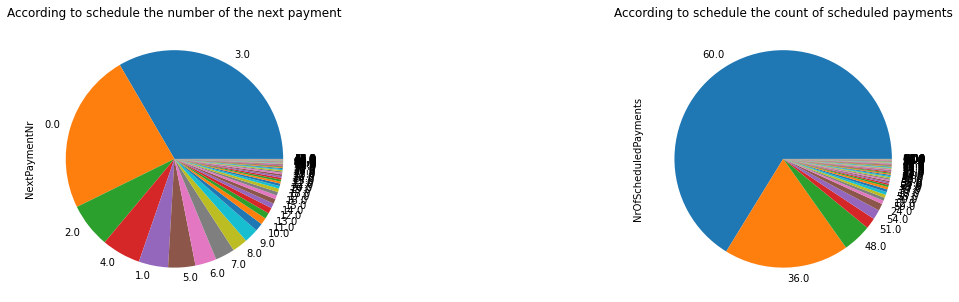

In [109]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
df_1.NextPaymentNr.value_counts().plot(kind = 'pie')
plt.title("According to schedule the number of the next payment")
plt.subplot(1,2,2)
df_1.NrOfScheduledPayments.value_counts().plot(kind = 'pie')
plt.title("According to schedule the count of scheduled payments")
plt.show()

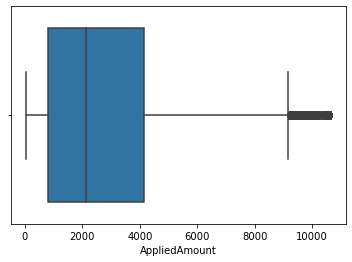

In [110]:
sns.boxplot(df_1.AppliedAmount)
plt.show()

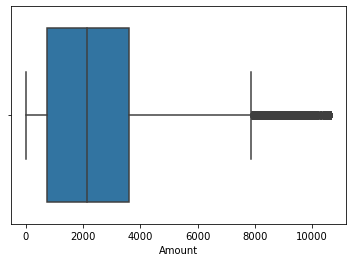

In [111]:
sns.boxplot(df_1.Amount)
plt.show()

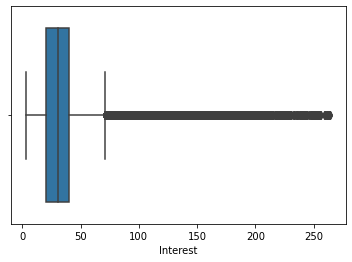

In [112]:
sns.boxplot(df_1.Interest)
plt.show()

In [113]:
#fuction for bivarient analysis of AppLied amount, Amount, and interest
# since we are having outliers so we are doing median analysis
def loaninfo(i):
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    df_1.groupby([i]).median()['AppliedAmount'].plot(kind = 'bar', color = 'red')
    plt.title("Median amount which borrower applied for originally")
    plt.subplot(1,3,2)
    df_1.groupby([i]).median()['Amount'].plot(kind = 'bar', color = 'green')
    plt.title("Median Amount the borrower received on the Primary Market")
    plt.subplot(1,3,3)
    df_1.groupby([i]).median()['Interest'].plot(kind = 'bar', color = 'yellow')
    plt.title("Median interest rate accepted in the loan application")

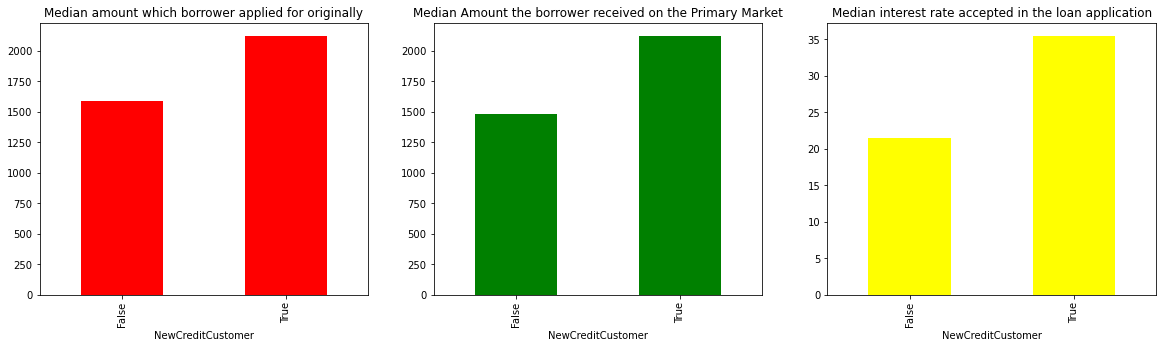

In [114]:
loaninfo('NewCreditCustomer')

- mean amount and interest is more for new credit customers as compare to regular borrower

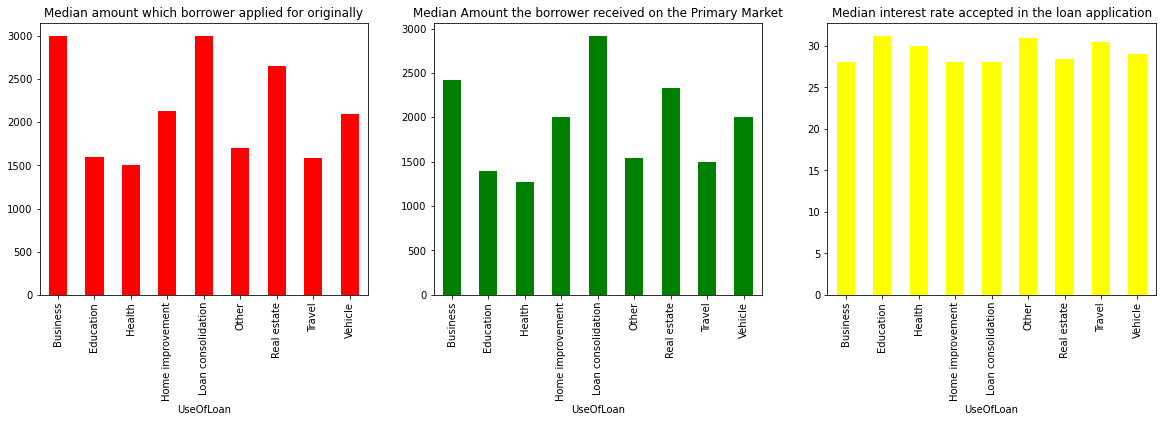

In [115]:
loaninfo('UseOfLoan')

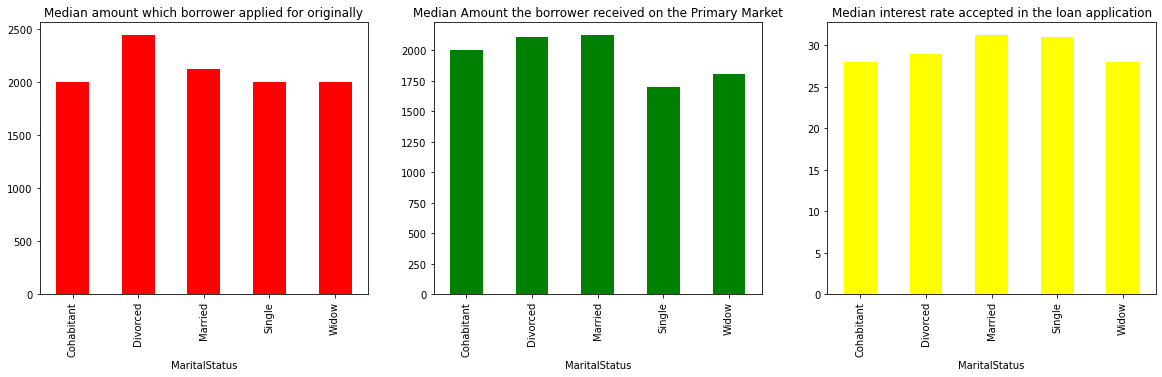

In [116]:
loaninfo('MaritalStatus')

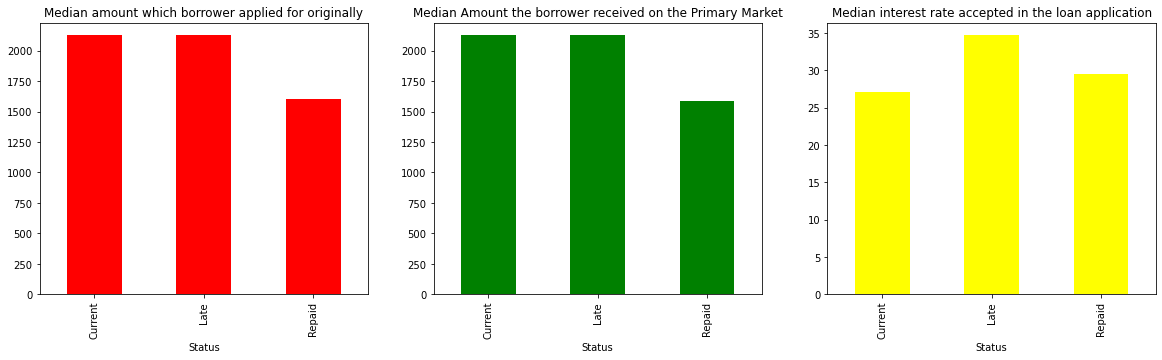

In [117]:
loaninfo('Status')

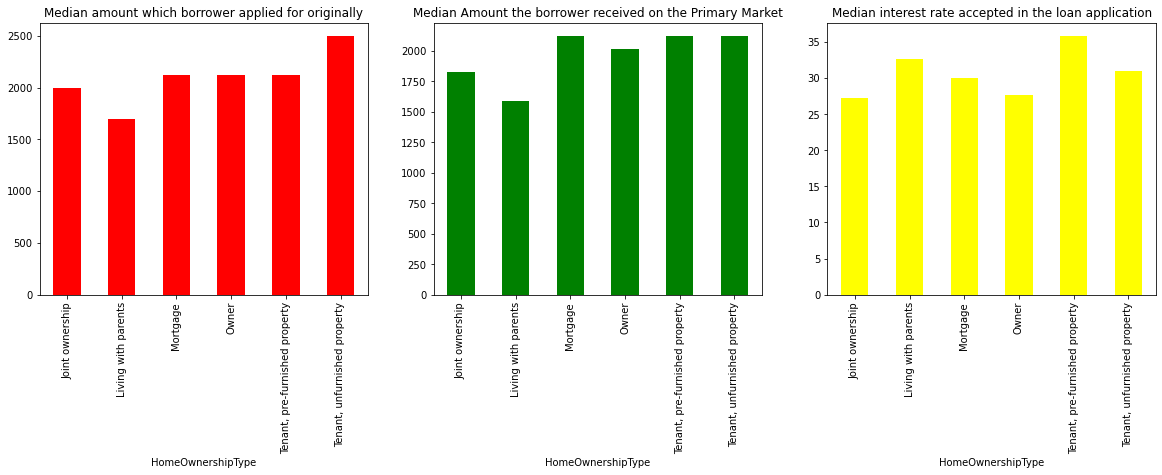

In [118]:
loaninfo('HomeOwnershipType')

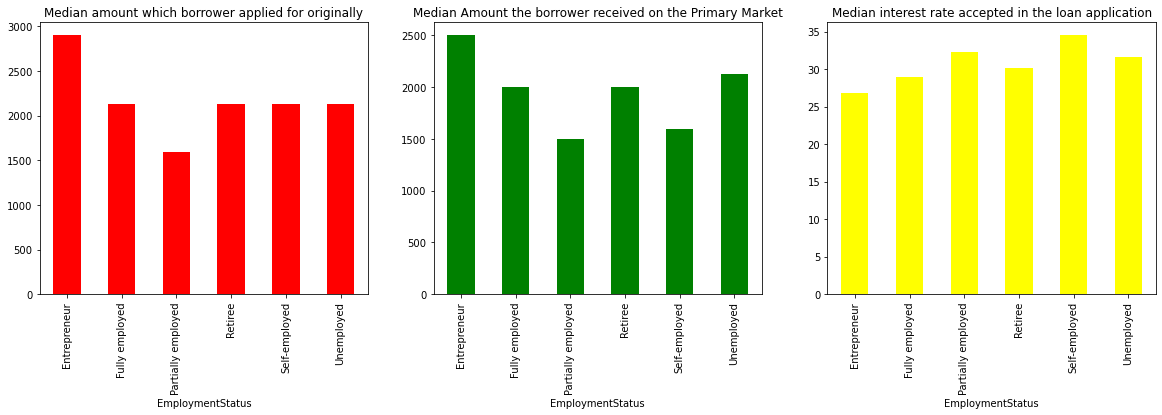

In [119]:
loaninfo('EmploymentStatus')

In [120]:
def Incomeinfo(i):
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    df_1.groupby([i]).median()['IncomeTotal'].plot(kind = 'bar')
    plt.title("Median of Borrower's total income")
    plt.subplot(1,3,2)
    df_1.groupby([i]).mean()['FreeCash'].plot(kind = 'bar', color = 'orange')
    plt.title("Median of Discretionary income after monthly liabilities")
    plt.subplot(1,3,3)
    df_1.groupby([i]).mean()['DebtToIncome'].plot(kind = 'bar', color = 'pink')
    plt.title("Median Ratio of borrower's monthly gross income that goes toward paying loans")

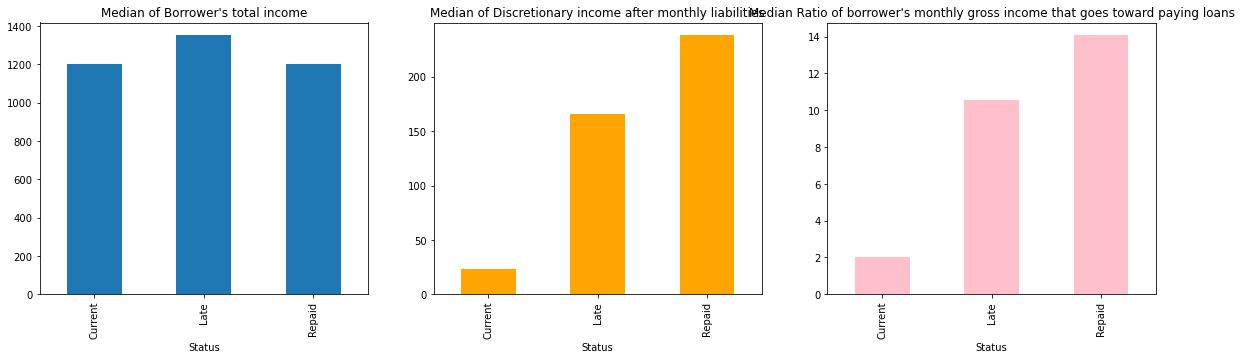

In [121]:
Incomeinfo('Status')

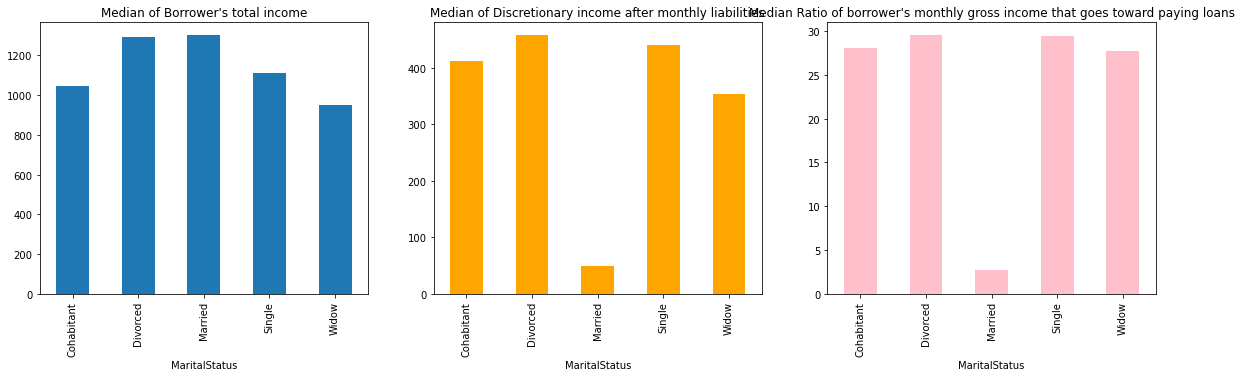

In [122]:
Incomeinfo('MaritalStatus')

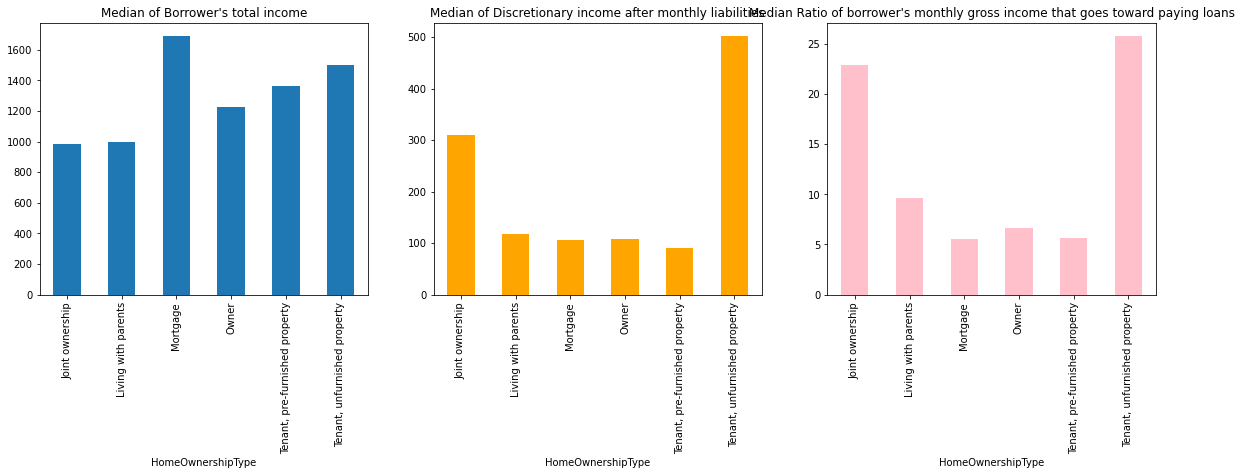

In [123]:
Incomeinfo('HomeOwnershipType')

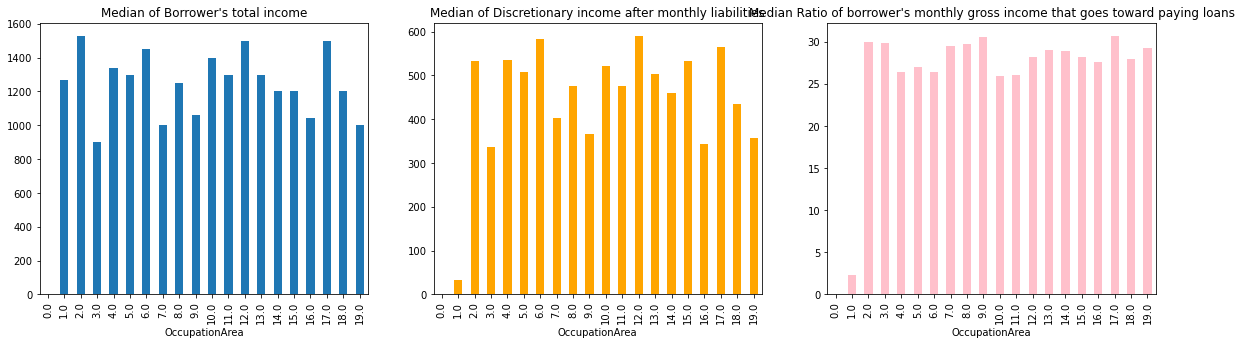

In [124]:
Incomeinfo('OccupationArea')

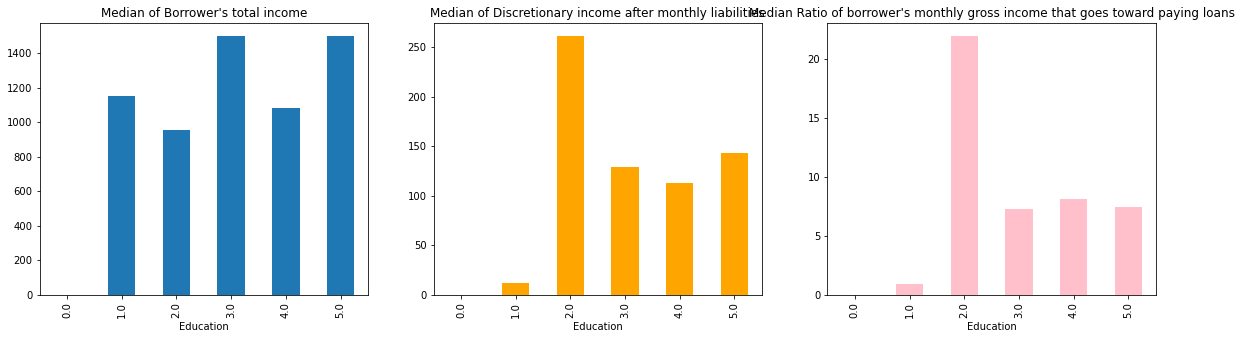

In [125]:
Incomeinfo('Education')

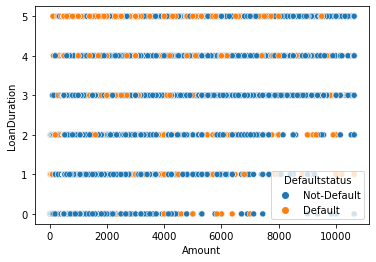

In [126]:
# Ploting a scatter plot against Amount and the LoanDuration to find any pattern
sns.scatterplot(x='Amount',y='LoanDuration',data=df_1,hue='Defaultstatus')
plt.show()

- Loan Duration of 60 months with an amount less than 4000 have a chance to be in default category

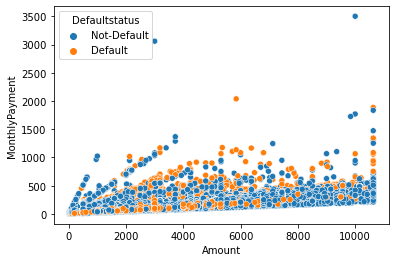

In [127]:
# Ploting a scatter plot against Amount and the Monthly Payment to find any pattern
sns.scatterplot(x='Amount',y='MonthlyPayment',data=df_1,hue='Defaultstatus')
plt.show()

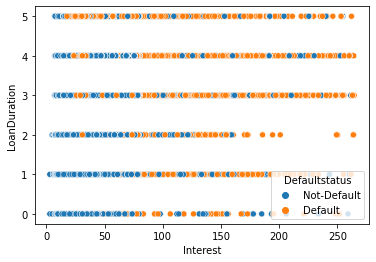

In [128]:
sns.scatterplot(x='Interest',y='LoanDuration',data=df_1,hue='Defaultstatus')
plt.show()

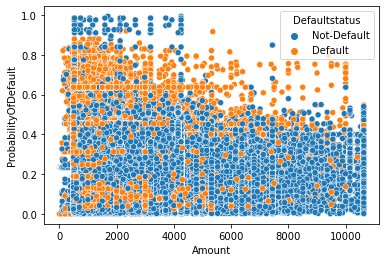

In [129]:
sns.scatterplot(x='Amount',y='ProbabilityOfDefault',data=df_1,hue='Defaultstatus')
plt.show()

## Feature Engineering

In [130]:
df.shape

(134529, 62)

In [131]:
df_2 = df_copy

In [132]:
df_2

,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus
0,2009-06-11 16:40:39,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,17,2.0,1,61,1.0,EE,319.5582,115.0408,30.00,12,11.214997,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,1.0,6000.0,10500.0,0,0.00,0,0.00,0.00,25,True,319.0800,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,91-120,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,3.0,60.0,Not-Default
1,2009-06-10 15:48:57,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,20,2.0,1,48,1.0,EE,191.7349,140.6057,25.00,1,143.534985,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,1.0,8300.0,10800.0,0,0.00,0,0.00,0.00,15,True,45.8300,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,180+,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,3.0,60.0,Not-Default
2,2009-06-05 19:12:29,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,20,2.0,1,58,1.0,EE,319.5582,319.5409,25.00,20,19.699580,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,1.0,5000.0,7000.0,0,0.00,0,0.00,0.00,25,True,197.2926,0.123398,0.506748,0.134049,0.234140,116.35,6.0,E,Late,True,180+,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,3.0,60.0,Default
3,2009-06-13 12:01:20,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,12,2.0,1,23,1.0,EE,127.8233,57.5205,45.00,15,5.083429,HARJU,PALDISKI,0,2.0,3.0,1.0,UpTo2Years,1.0,1.0,11000.0,11600.0,0,0.00,0,0.00,0.00,15,True,293.1000,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,31-60,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,3.0,60.0,Not-Default
4,2009-06-10 10:17:13,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,10,2.0,1,25,1.0,EE,319.5582,319.5436,30.00,12,31.151388,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,1.0,6800.0,6800.0,0,0.00,0,0.00,0.00,25,True,833.8100,0.123398,0.506748,0.134049,0.234140,0.00,6.0,E,Repaid,False,180+,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,3.0,60.0,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2015-01-02 16:31:36,2515,0,485.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,16,3.0,4,37,0.0,FI,3000.0000,3000.0000,31.01,60,98.929540,PÄIJÄT-HÄME,LAHTI,0,3.0,3.0,3.0,MoreThan5Years,1.0,5.0,1400.0,1400.0,1,500.00,0,7.69,792.32,1,True,3000.0000,0.146732,0.900000,0.163368,0.125412,0.00,1.0,E,Repaid,False,180+,M,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,3.0,60.0,Default
134525,2015-01-05 16:14:26,1880,0,1120.0000,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,16,3.0,4,35,0.0,FI,3000.0000,3000.0000,18.25,60,76.588868,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,3.0,MoreThan5Years,8.0,1.0,2265.0,2265.0,5,1777.46,0,31.58,520.67,7,True,16.3200,0.053246,0.900000,0.129254,0.045510,0.00,1.0,B,Repaid,False,31-60,M,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,3.0,60.0,Not-Default
134526,2015-01-02 14:04:27,1975,0,525.0000,Tr

In [133]:
df_2['LoanDate'] = pd.to_datetime(df_2['LoanDate'], errors = 'coerce')
df_2['LoanYear'] = pd.DatetimeIndex(df_2['LoanDate']).year

In [134]:
columns_to_drop = ['BiddingStartedOn','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','County','City']
for i in columns_to_drop:
    df_2.drop([i],axis=1,inplace=True)

In [135]:
df_2.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus,LoanYear
0,0,0,115.0410,True,17,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,11.214997,7,3.0,1.0,3.0,UpTo3Years,7.0,1.0,6000.0,10500.0,0,0.0,0,0.0,0.0,25,True,319.0800,0.123398,0.506748,0.134049,0.23414,0.00,6.0,E,Repaid,False,91-120,M,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,3.0,60.0,Not-Default,2009
1,0,0,140.6057,False,20,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,143.534985,7,5.0,4.0,3.0,MoreThan5Years,16.0,1.0,8300.0,10800.0,0,0.0,0,0.0,0.0,15,True,45.8300,0.123398,0.506748,0.134049,0.23414,0.00,6.0,E,Repaid,False,180+,M,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,3.0,60.0,Not-Default,2009
2,0,0,319.5580,True,20,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,19.699580,2,4.0,1.0,3.0,UpTo4Years,9.0,1.0,5000.0,7000.0,0,0.0,0,0.0,0.0,25,True,197.2926,0.123398,0.506748,0.134049,0.23414,116.35,6.0,E,Late,True,180+,M,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,3.0,60.0,Default,2009
3,0,0,57.5205,True,12,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,5.083429,0,2.0,3.0,1.0,UpTo2Years,1.0,1.0,11000.0,11600.0,0,0.0,0,0.0,0.0,15,True,293.1000,0.123398,0.506748,0.134049,0.23414,0.00,6.0,E,Repaid,False,31-60,M,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,3.0,60.0,Not-Default,2009
4,0,0,319.5582,True,10,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,31.151388,6,4.0,2.0,3.0,UpTo2Years,7.0,1.0,6800.0,6800.0,0,0.0,0,0.0,0.0,25,True,833.8100,0.123398,0.506748,0.134049,0.23414,0.00,6.0,E,Repaid,False,180+,M,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,3.0,60.0,Default,2009


In [136]:
df_2['WorseLateCategory'] = df_2['WorseLateCategory'].replace('61-90', 3)
df_2['WorseLateCategory'] = df_2['WorseLateCategory'].replace('31-60', 2)
df_2['WorseLateCategory'] = df_2['WorseLateCategory'].replace(['91-120', '121-150'], 4)
df_2['WorseLateCategory'] = df_2['WorseLateCategory'].replace(['1-7','8-15','16-30'], 1)
df_2['WorseLateCategory'] = df_2['WorseLateCategory'].replace(['180+','151-180'], 5)
df_2['WorseLateCategory'].fillna(0, inplace = True)

In [137]:
df_2['WorseLateCategory']

0         4
1         5
2         5
3         2
4         5
         ..
134524    5
134525    2
134526    5
134527    5
134528    5
Name: WorseLateCategory, Length: 134529, dtype: int64

In [138]:
# Converting the datatype of the eduction column and droping those columns having value zero
df_2['Education']=df_2['Education'].astype('int')
df_2.drop(df_2[df_2['Education'] == 0].index, inplace=True)

In [139]:
# Converting the datatype of the OccupationArea column and droping those columns having value zero
df_2['OccupationArea']=df_2['OccupationArea'].astype('int')
df_2.drop(df_2[df_2['OccupationArea'] == 0].index, inplace=True)

In [140]:
# Changing the datatype of column ModelVersion
df_2['ModelVersion']=df_2['ModelVersion'].astype('int')

In [141]:
# df_2.drop('Rating',axis=1,inplace=True)
df_2.drop('CreditScoreEsMicroL',axis=1,inplace=True)

In [142]:
# Filling the obsereved missing values 
df_2.UseOfLoan.fillna('Real estate', inplace = True)     

In [143]:
# Filling the obsereved missing values 
df_2.HomeOwnershipType.fillna(df_2['HomeOwnershipType'].mode, inplace = True)

In [144]:
# Filling the obsereved missing values 
df_2.EmploymentStatus.fillna(df_2['EmploymentStatus'].mode, inplace = True)

In [145]:
df_2['Defaultstatus'].value_counts()

Not-Default    91614
Default        42904
Name: Defaultstatus, dtype: int64

In [146]:
# Checking any missing values before Encoding 
df_2.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
ApplicationSignedHour                     0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer     

##  Data Encoding

In [147]:
lb = LabelEncoder()
colums_lb = ['VerificationType','NewCreditCustomer','Gender','Country','MaritalStatus','ActiveScheduleFirstPaymentReached',
            'Status','Restructured', 'Rating']


# Encoding the UseofLoan Column
df_2['UseOfLoan'] = df_2['UseOfLoan'].replace(['Home improvement','Real estate','Loan consolidation'], 1)
df_2['UseOfLoan'] = df_2['UseOfLoan'].replace(['Vehicle','Business'], 2)
df_2['UseOfLoan'] = df_2['UseOfLoan'].replace(['Travel','Health','Education'], 3)
df_2['UseOfLoan'] = df_2['UseOfLoan'].replace(['Other'],4)


# Encoding the EmployementStatus column
df_2=df_2.replace({'EmploymentStatus' : { 'Unemployed' : 1,'Partially employed' : 2,'Fully employed':3,
                                       'Self-employed':4,'Entrepreneur':5,'Retiree':6}}) 

# Ecoding the EmploymentDurationCurrentEmployer Column
df_2['EmploymentDurationCurrentEmployer'] = df_2['EmploymentDurationCurrentEmployer'].replace(['Other'], 1)
df_2['EmploymentDurationCurrentEmployer'] = df_2['EmploymentDurationCurrentEmployer'].replace(['TrialPeriod','UpTo1Year',], 2)
df_2['EmploymentDurationCurrentEmployer'] = df_2['EmploymentDurationCurrentEmployer'].replace(['UpTo2Years','UpTo3Years','UpTo4Years'], 3)
df_2['EmploymentDurationCurrentEmployer'] = df_2['EmploymentDurationCurrentEmployer'].replace(['UpTo5Years','MoreThan5Years','Retiree'],4)
 
    
# Encoding the OcuupationArea Column   
df_2['OccupationArea'] = df_2['OccupationArea'].replace([1], 1)
df_2['OccupationArea'] = df_2['OccupationArea'].replace([2,3,4,5,6], 2)
df_2['OccupationArea'] = df_2['OccupationArea'].replace([7,8,9,10], 3)
df_2['OccupationArea'] = df_2['OccupationArea'].replace([11,12,13,14],4)
df_2['OccupationArea'] = df_2['OccupationArea'].replace([15,16,17,18,19],4)

# Encoding the HomeOwnershipType Column
df_2['HomeOwnershipType'] = df_2['HomeOwnershipType'].replace(['Mortgage',], 1)
df_2['HomeOwnershipType'] = df_2['HomeOwnershipType'].replace(['Owner','Joint ownership','Living with parents'], 2)
df_2['HomeOwnershipType'] = df_2['HomeOwnershipType'].replace(['Tenant, unfurnished property','Tenant, pre-furnished property'], 3)


# Encoding the DefaultStatus Column
df_2=df_2.replace({'Defaultstatus' : { 'Default' : 0,'Not-Default' : 1}})

for i in colums_lb:
    df_2[i]=lb.fit_transform(df_2[i])


## Handling Outliers

In [148]:
columns = ['BidsPortfolioManager','BidsApi','BidsManual','ApplicationSignedHour','Age','AppliedAmount','Amount','Interest',
          'LoanDuration','MonthlyPayment','IncomeFromPrincipalEmployer','IncomeTotal','ExistingLiabilities','LiabilitiesTotal',
          'RefinanceLiabilities','DebtToIncome','FreeCash','MonthlyPaymentDay','PlannedInterestTillDate','ExpectedLoss',
          'LossGivenDefault','ExpectedReturn','ProbabilityOfDefault','PrincipalOverdueBySchedule','PrincipalPaymentsMade',
          'InterestAndPenaltyPaymentsMade','PrincipalBalance','InterestAndPenaltyBalance','AmountOfPreviousLoansBeforeLoan',
          'PreviousRepaymentsBeforeLoan','PreviousEarlyRepaymentsCountBeforeLoan','NextPaymentNr','NrOfScheduledPayments','LoanYear']

In [149]:
for i in columns:
    Q1 = df_2[i].quantile(0.25)
    Q3 = df_2[i].quantile(0.75)
    IQR = Q3 - Q1
    ft_max = Q3 + 1.5*IQR
    ft_min = Q1 - 1.5*IQR
    df_2[i] = np.where(df_2[i] > ft_max, ft_max, df_2[i])
    df_2[i] = np.where(df_2[i] < ft_min, ft_min, df_2[i])


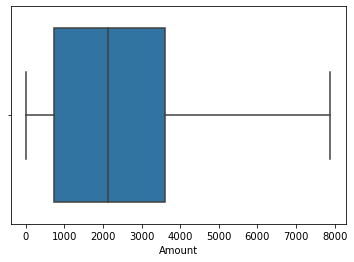

In [150]:
sns.boxplot(df_2['Amount'])
plt.show()

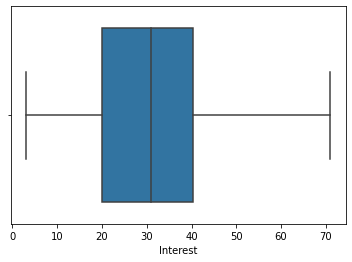

In [151]:
sns.boxplot(df_2['Interest'])
plt.show()

In [152]:
df_2

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus,LoanYear
0,0.0,0.0,115.0410,1,17.0,1,1,61.0,1,0,319.5582,115.0408,30.00,12.0,11.214997,7,3,0,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,319.0800,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,4,115.04080,20.42220,0.00,0.00,1,83.0852,0.0000,0.0,3.0,60.0,1,2014.0
1,0.0,0.0,140.6057,0,20.0,1,1,48.0,1,0,191.7349,140.6057,25.00,1.0,143.534985,7,5,3,3.0,4,4,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,15.0,1,45.8300,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,5,140.60570,2.02270,0.00,0.00,2,255.6467,258.6256,0.0,3.0,60.0,1,2014.0
2,0.0,0.0,319.5580,1,20.0,1,1,58.0,1,0,319.5582,319.5409,25.00,20.0,19.699580,2,4,0,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,197.2926,0.123398,0.506748,0.134049,0.234140,116.35,6,5,1,1,5,203.19090,59.76260,116.35,414.07,0,0.0000,0.0000,0.0,3.0,60.0,0,2014.0
3,0.0,0.0,57.5205,1,12.0,1,1,23.0,1,0,127.8233,57.5205,45.00,15.0,5.083429,0,2,2,1.0,3,1,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,15.0,1,293.1000,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,2,57.52050,18.73230,0.00,0.00,1,134.2144,0.0000,0.0,3.0,60.0,1,2014.0
4,0.0,0.0,319.5582,1,10.0,1,1,25.0,1,0,319.5582,319.5436,30.00,12.0,31.151388,6,4,1,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,833.8100,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,5,319.54360,220.42000,0.00,0.00,1,146.9966,0.0000,0.0,3.0,60.0,0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515.0,0.0,485.0000,1,16.0,2,4,37.0,0,2,3000.0000,3000.0000,31.01,60.0,98.929540,0,3,2,3.0,4,1,5.0,815.0,1400.0,1.0,500.0000,0.0,7.49375,4.01875,1.0,1,1587.1125,0.146732,0.900000,0.163368,0.125412,0.00,1,5,2,0,5,1840.54875,0.00000,0.00,0.00,0,0.0000,0.0000,0.0,3.0,60.0,0,2015.0
134525,1880.0,0.0,1120.0000,0,16.0,2,4,35.0,0,2,3000.0000,3000.0000,18.25,60.0,76.588868,2,3,2,3.0,4,3,1.0,815.0,2265.0,5.0,1441.0375,0.0,7.49375,4.01875,7.0,1,16.3200,0.053246,0.900000,0.129254,0.045510,0.00,1,2,2,0,2,1840.54875,1353.98375,0.00,0.00,1,3000.0000,389.3600,0.0,3.0,60.0,1,2015.0
134526,1975.0,0.0,525.0000,1,13.0,0,4,40.0,0,2,2500.0000,2500.0000,24.83,60.0,73.129355,0,3,0,5.0,4,2,1.0,815.0,2500.0,2.0,1350.0000,0.0,3.22000,4.01875,1.0,1,1587.1125,0.104219,0.900000,0.144081,0.089076,132.30,1,4,1,0,5,1840.54875,199.33000,630.24,507.25,0,0.0000,0.0000,0.0,0.0,60.0,0,2015.0
134527,1840.0,0.0,1160.0000,0,16.0,3,1,47.0,1,0,3000.0000,3000.0000,17.74,60.0,75.756600,7,5,0,3.0,4,4,4.0,521.0,540.0,8.0,732.0500,0.0,7.49375,4.01875,1.0,1,1587.1125,0.035612,0.650000,0.141788,0.042144,132.30,1,2,2,1,5,1840.54875,561.53000,0.00,0.00,1,500.0000,96.8000,0.0,3.0,60.0,0,2015.0


### Performing SMOTE method for handling imbalanced data

In [153]:
df_2['Defaultstatus'].value_counts()

1    91614
0    42904
Name: Defaultstatus, dtype: int64

In [154]:
# pip install --upgrade imbalanced-learn

In [155]:
sampling = SMOTE()

In [156]:
x = df_2.drop('Defaultstatus', axis = 1)
y = df_2['Defaultstatus']

In [157]:
df_2

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus,LoanYear
0,0.0,0.0,115.0410,1,17.0,1,1,61.0,1,0,319.5582,115.0408,30.00,12.0,11.214997,7,3,0,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,319.0800,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,4,115.04080,20.42220,0.00,0.00,1,83.0852,0.0000,0.0,3.0,60.0,1,2014.0
1,0.0,0.0,140.6057,0,20.0,1,1,48.0,1,0,191.7349,140.6057,25.00,1.0,143.534985,7,5,3,3.0,4,4,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,15.0,1,45.8300,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,5,140.60570,2.02270,0.00,0.00,2,255.6467,258.6256,0.0,3.0,60.0,1,2014.0
2,0.0,0.0,319.5580,1,20.0,1,1,58.0,1,0,319.5582,319.5409,25.00,20.0,19.699580,2,4,0,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,197.2926,0.123398,0.506748,0.134049,0.234140,116.35,6,5,1,1,5,203.19090,59.76260,116.35,414.07,0,0.0000,0.0000,0.0,3.0,60.0,0,2014.0
3,0.0,0.0,57.5205,1,12.0,1,1,23.0,1,0,127.8233,57.5205,45.00,15.0,5.083429,0,2,2,1.0,3,1,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,15.0,1,293.1000,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,2,57.52050,18.73230,0.00,0.00,1,134.2144,0.0000,0.0,3.0,60.0,1,2014.0
4,0.0,0.0,319.5582,1,10.0,1,1,25.0,1,0,319.5582,319.5436,30.00,12.0,31.151388,6,4,1,3.0,3,3,1.0,815.0,3464.5,0.0,0.0000,0.0,0.00000,0.00000,25.0,1,833.8100,0.123398,0.506748,0.134049,0.234140,0.00,6,5,2,0,5,319.54360,220.42000,0.00,0.00,1,146.9966,0.0000,0.0,3.0,60.0,0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515.0,0.0,485.0000,1,16.0,2,4,37.0,0,2,3000.0000,3000.0000,31.01,60.0,98.929540,0,3,2,3.0,4,1,5.0,815.0,1400.0,1.0,500.0000,0.0,7.49375,4.01875,1.0,1,1587.1125,0.146732,0.900000,0.163368,0.125412,0.00,1,5,2,0,5,1840.54875,0.00000,0.00,0.00,0,0.0000,0.0000,0.0,3.0,60.0,0,2015.0
134525,1880.0,0.0,1120.0000,0,16.0,2,4,35.0,0,2,3000.0000,3000.0000,18.25,60.0,76.588868,2,3,2,3.0,4,3,1.0,815.0,2265.0,5.0,1441.0375,0.0,7.49375,4.01875,7.0,1,16.3200,0.053246,0.900000,0.129254,0.045510,0.00,1,2,2,0,2,1840.54875,1353.98375,0.00,0.00,1,3000.0000,389.3600,0.0,3.0,60.0,1,2015.0
134526,1975.0,0.0,525.0000,1,13.0,0,4,40.0,0,2,2500.0000,2500.0000,24.83,60.0,73.129355,0,3,0,5.0,4,2,1.0,815.0,2500.0,2.0,1350.0000,0.0,3.22000,4.01875,1.0,1,1587.1125,0.104219,0.900000,0.144081,0.089076,132.30,1,4,1,0,5,1840.54875,199.33000,630.24,507.25,0,0.0000,0.0000,0.0,0.0,60.0,0,2015.0
134527,1840.0,0.0,1160.0000,0,16.0,3,1,47.0,1,0,3000.0000,3000.0000,17.74,60.0,75.756600,7,5,0,3.0,4,4,4.0,521.0,540.0,8.0,732.0500,0.0,7.49375,4.01875,1.0,1,1587.1125,0.035612,0.650000,0.141788,0.042144,132.30,1,2,2,1,5,1840.54875,561.53000,0.00,0.00,1,500.0000,96.8000,0.0,3.0,60.0,0,2015.0


In [158]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [159]:
x_train.shape , y_train.shape

((107614, 53), (107614,))

In [160]:
X_train,Y_train = sampling.fit_resample(x_train,y_train)

In [161]:
X_train.shape,Y_train.shape

((146662, 53), (146662,))

In [162]:
# x_sampled = pd.DataFrame(X, columns = x.columns)

In [163]:
# y_sampled = pd.DataFrame(Y, columns = ['Defaultstatus'])

In [164]:
# df_2 = pd.concat([x_sampled, y_sampled], axis = 1)

In [165]:
Y_train.value_counts()

0    73331
1    73331
Name: Defaultstatus, dtype: int64

## Standardization

In [166]:
scalar = StandardScaler()

In [167]:
# Scaling the X_train dataset
XS_train = pd.DataFrame(scalar.fit_transform(X_train),columns = X_train.columns)

In [168]:
# Scaling the X_test dataset
XS_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns)

In [169]:
XS_train

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,LoanYear
0,-0.709841,-0.666679,-0.525280,-1.197203,-2.812222,-1.289966,-0.994773,0.540213,1.009839,-0.831519,-0.731236,-0.724389,-1.286372,0.932947,-1.043234,-0.469184,1.249244,-0.481692,-0.636076,0.745795,-0.511935,-0.865934,-0.643847,-0.216589,-0.043528,-0.935593,0.0,-0.655779,-0.657245,-1.470834,0.201821,-0.935059,-1.152248,-1.539341,-1.063041,-1.353372,-0.822625,0.772092,-1.224702,-1.253093,2.104211,-1.779749,-0.695560,-0.718245,-0.418993,-0.823474,0.752759,-0.223032,-0.466047,0.0,-0.266983,0.456325,0.927922
1,-0.003723,-0.666679,0.116461,0.835280,0.337314,0.910990,0.546001,-1.653947,-0.632451,1.558459,-0.309908,-0.231925,1.399775,0.932947,0.016986,-0.469184,-0.503522,-0.481692,-0.636076,-1.472638,-0.511935,-0.865934,-0.643847,0.667491,-0.382330,-0.105896,0.0,-0.655779,-0.657245,-1.035925,0.201821,-0.771885,0.806181,0.717782,0.883761,0.916633,0.632212,0.772092,0.908177,0.151199,-0.475237,0.660081,-0.790451,-0.511481,0.163572,1.395928,-0.594742,-0.685079,-0.285293,0.0,-0.887544,0.652885,0.347112
2,1.421710,1.935457,-0.936999,0.835280,0.547283,-1.289966,1.573185,-0.810039,2.652128,0.363470,-0.217743,-0.124199,2.040877,-2.334616,2.579260,0.446682,-0.503522,2.084264,1.126492,-0.363421,1.688606,-0.865934,1.702225,-0.342886,-0.721133,-0.201113,0.0,1.588028,1.556688,-1.325864,0.201821,1.890637,2.482288,0.943739,2.486007,2.286170,1.418583,-0.234531,1.441397,0.151199,-0.475237,0.660081,-0.798047,-0.861989,0.286286,1.395928,-0.594742,-0.685079,-0.892448,0.0,0.043297,0.652885,-0.233699
3,0.749689,-0.666679,-0.944731,-1.197203,1.387159,0.910990,1.573185,-0.556867,2.652128,0.363470,-0.498628,-0.452508,0.681307,-0.700834,-0.279922,-0.469184,-0.503522,-0.481692,-0.636076,0.745795,-0.511935,-0.491940,-0.643847,-0.273423,-0.382330,-0.615307,0.0,-0.655779,-0.657245,-1.470834,0.201821,1.130686,0.282298,1.155023,0.861765,0.791139,1.418583,0.268780,0.908177,0.151199,-0.475237,0.660081,-0.645909,-0.069022,-0.133981,1.395928,0.303592,0.363972,1.525900,0.0,-0.887544,-1.705834,-0.233699
4,2.095382,1.831372,1.370948,0.835280,-0.292593,-1.289966,-0.994773,0.708995,-0.632451,-0.831519,2.349725,2.776205,0.200622,0.932947,2.579260,-0.469184,1.249244,-0.481692,-0.636076,0.745795,-0.511935,2.500015,-0.643847,1.677868,-0.721133,-0.900197,0.0,-0.655779,-0.657245,-0.456048,0.201821,-0.219196,0.015254,0.149925,-0.148379,0.608421,-0.822625,0.772092,0.374958,-1.253093,2.104211,-1.169792,0.065858,2.215117,2.596087,-0.823474,-0.145575,-0.223032,-0.587859,0.0,2.215260,0.652885,0.927922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,0.632186,-0.666679,1.281671,0.835280,0.815902,0.177338,0.546001,1.154185,-0.632451,1.558459,0.012876,0.083549,-0.165002,-0.065837,-0.005209,0.141394,-0.503522,0.801286,1.126492,0.745795,-0.511935,0.484684,1.702225,1.275552,0.163593,1.697031,0.0,1.588028,1.556688,-0.682005,0.201821,1.885986,-0.683063,1.440355,1.862747,-1.326748,1.418583,-2.247777,-0.691482,0.151199,-0.

## Feature Selection

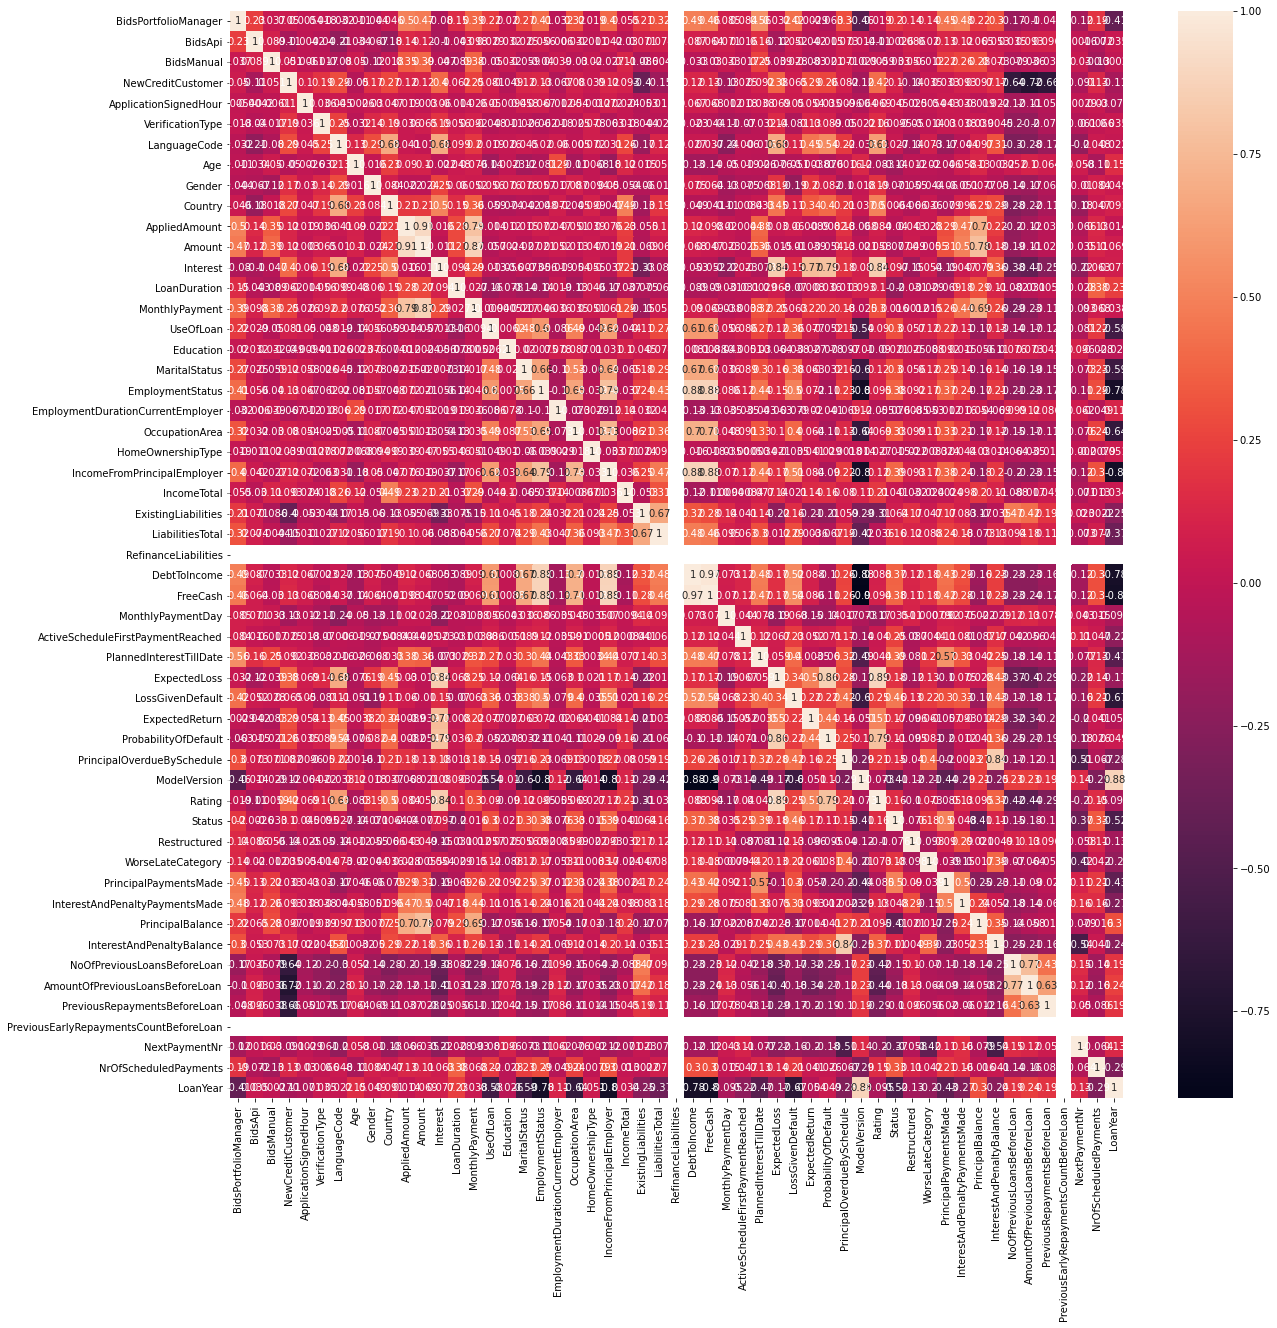

In [170]:
plt.figure(figsize=(20,20))
sns.heatmap(XS_train.corr(),annot=True)
plt.show()

## Removing Constant Features

In [171]:
XS_train.shape,Y_train.shape

((146662, 53), (146662,))

In [172]:
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(XS_train)

VarianceThreshold(threshold=0)

In [173]:
## means we have two features whose variance is 0 or we can say that they have constant data
cons_fet = [i for i in XS_train.columns if i not in XS_train.columns[var_thres.get_support()]]
len(cons_fet)

2

In [174]:
cons_fet

['RefinanceLiabilities', 'PreviousEarlyRepaymentsCountBeforeLoan']

In [175]:
XS_train.drop(cons_fet,axis=1,inplace=True)
XS_test.drop(cons_fet,axis=1,inplace=True)

In [176]:
XS_train

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,Rating,Status,Restructured,WorseLateCategory,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,NextPaymentNr,NrOfScheduledPayments,LoanYear
0,-0.709841,-0.666679,-0.525280,-1.197203,-2.812222,-1.289966,-0.994773,0.540213,1.009839,-0.831519,-0.731236,-0.724389,-1.286372,0.932947,-1.043234,-0.469184,1.249244,-0.481692,-0.636076,0.745795,-0.511935,-0.865934,-0.643847,-0.216589,-0.043528,-0.935593,-0.655779,-0.657245,-1.470834,0.201821,-0.935059,-1.152248,-1.539341,-1.063041,-1.353372,-0.822625,0.772092,-1.224702,-1.253093,2.104211,-1.779749,-0.695560,-0.718245,-0.418993,-0.823474,0.752759,-0.223032,-0.466047,-0.266983,0.456325,0.927922
1,-0.003723,-0.666679,0.116461,0.835280,0.337314,0.910990,0.546001,-1.653947,-0.632451,1.558459,-0.309908,-0.231925,1.399775,0.932947,0.016986,-0.469184,-0.503522,-0.481692,-0.636076,-1.472638,-0.511935,-0.865934,-0.643847,0.667491,-0.382330,-0.105896,-0.655779,-0.657245,-1.035925,0.201821,-0.771885,0.806181,0.717782,0.883761,0.916633,0.632212,0.772092,0.908177,0.151199,-0.475237,0.660081,-0.790451,-0.511481,0.163572,1.395928,-0.594742,-0.685079,-0.285293,-0.887544,0.652885,0.347112
2,1.421710,1.935457,-0.936999,0.835280,0.547283,-1.289966,1.573185,-0.810039,2.652128,0.363470,-0.217743,-0.124199,2.040877,-2.334616,2.579260,0.446682,-0.503522,2.084264,1.126492,-0.363421,1.688606,-0.865934,1.702225,-0.342886,-0.721133,-0.201113,1.588028,1.556688,-1.325864,0.201821,1.890637,2.482288,0.943739,2.486007,2.286170,1.418583,-0.234531,1.441397,0.151199,-0.475237,0.660081,-0.798047,-0.861989,0.286286,1.395928,-0.594742,-0.685079,-0.892448,0.043297,0.652885,-0.233699
3,0.749689,-0.666679,-0.944731,-1.197203,1.387159,0.910990,1.573185,-0.556867,2.652128,0.363470,-0.498628,-0.452508,0.681307,-0.700834,-0.279922,-0.469184,-0.503522,-0.481692,-0.636076,0.745795,-0.511935,-0.491940,-0.643847,-0.273423,-0.382330,-0.615307,-0.655779,-0.657245,-1.470834,0.201821,1.130686,0.282298,1.155023,0.861765,0.791139,1.418583,0.268780,0.908177,0.151199,-0.475237,0.660081,-0.645909,-0.069022,-0.133981,1.395928,0.303592,0.363972,1.525900,-0.887544,-1.705834,-0.233699
4,2.095382,1.831372,1.370948,0.835280,-0.292593,-1.289966,-0.994773,0.708995,-0.632451,-0.831519,2.349725,2.776205,0.200622,0.932947,2.579260,-0.469184,1.249244,-0.481692,-0.636076,0.745795,-0.511935,2.500015,-0.643847,1.677868,-0.721133,-0.900197,-0.655779,-0.657245,-0.456048,0.201821,-0.219196,0.015254,0.149925,-0.148379,0.608421,-0.822625,0.772092,0.374958,-1.253093,2.104211,-1.169792,0.065858,2.215117,2.596087,-0.823474,-0.145575,-0.223032,-0.587859,2.215260,0.652885,0.927922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146657,0.632186,-0.666679,1.281671,0.835280,0.815902,0.177338,0.546001,1.154185,-0.632451,1.558459,0.012876,0.083549,-0.165002,-0.065837,-0.005209,0.141394,-0.503522,0.801286,1.126492,0.745795,-0.511935,0.484684,1.702225,1.275552,0.163593,1.697031,1.588028,1.556688,-0.682005,0.201821,1.885986,-0.683063,1.440355,1.862747,-1.326748,1.418583,-2.247777,-0.691482,0.151199,-0.475237,0.660081,0.026891,-0.443429,0.221682,1.395928,-0.594742,-0.685079,-0.892448,0.043297,0.652885,-1.976129
1

## Multicolinearity

In [177]:
# Developing a function which can retrieve the columns which shows multinearity
def correlation(dataset, threshold):
    cor_col = set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                col_name= corr_matrix.columns[i]
                cor_col.add(col_name)
    return cor_col

In [178]:
corr_columns = correlation(XS_train, 0.80)

In [179]:
# Columns showing the property of multicolinearity
corr_columns

{'Amount',
 'DebtToIncome',
 'ExpectedLoss',
 'FreeCash',
 'InterestAndPenaltyBalance',
 'LoanYear',
 'MonthlyPayment',
 'ProbabilityOfDefault',
 'Rating'}

In [180]:
num_columns = [i for i in XS_train.columns if np.dtype(XS_train[i]) != 'O']
for i in range(len(num_columns)):
    for j in range(len(num_columns)):
        correlation = XS_train[num_columns[j]].corr(XS_train[num_columns[i]])
        if (correlation >= 0.85 and j<i):
            print(num_columns[i] + " : " + num_columns[j])

Amount : AppliedAmount
MonthlyPayment : Amount
DebtToIncome : EmploymentStatus
DebtToIncome : IncomeFromPrincipalEmployer
FreeCash : EmploymentStatus
FreeCash : IncomeFromPrincipalEmployer
FreeCash : DebtToIncome
ProbabilityOfDefault : ExpectedLoss
Rating : ExpectedLoss
LoanYear : ModelVersion


In [181]:
# Dropping the multicolinear columns from the trian data and the data 
XS_train.drop(corr_columns,axis=1,inplace=True)
XS_test.drop(corr_columns,axis=1,inplace=True)

In [182]:
XS_train.shape

(146662, 42)

## Mutual Information

In [183]:
mutual_info = mutual_info_classif(XS_train,Y_train)
mutual_info

array([0.19864457, 0.10460651, 0.18765488, 0.01195854, 0.21465633,
       0.05737983, 0.04789776, 0.22646301, 0.01632678, 0.02711646,
       0.18044129, 0.19941092, 0.10010137, 0.05481993, 0.03051068,
       0.02745991, 0.07082874, 0.04155017, 0.03740387, 0.16724087,
       0.06432117, 0.18024463, 0.14735147, 0.03578155, 0.21524597,
       0.02987173, 0.12573041, 0.2511284 , 0.17225957, 0.38337973,
       0.09912404, 0.40831789, 0.00486107, 0.2065238 , 0.12857182,
       0.04645534, 0.12572427, 0.02194303, 0.06473813, 0.0636762 ,
       0.50426139, 0.0821845 ])

In [184]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = XS_train.columns
mutual_info.sort_values(ascending=False)

NextPaymentNr                        0.504261
Status                               0.408318
PrincipalOverdueBySchedule           0.383380
LossGivenDefault                     0.251128
Age                                  0.226463
MonthlyPaymentDay                    0.215246
ApplicationSignedHour                0.214656
WorseLateCategory                    0.206524
Interest                             0.199411
BidsPortfolioManager                 0.198645
BidsManual                           0.187655
AppliedAmount                        0.180441
IncomeTotal                          0.180245
ExpectedReturn                       0.172260
HomeOwnershipType                    0.167241
ExistingLiabilities                  0.147351
PrincipalPaymentsMade                0.128572
PlannedInterestTillDate              0.125730
PrincipalBalance                     0.125724
BidsApi                              0.104607
LoanDuration                         0.100101
ModelVersion                      

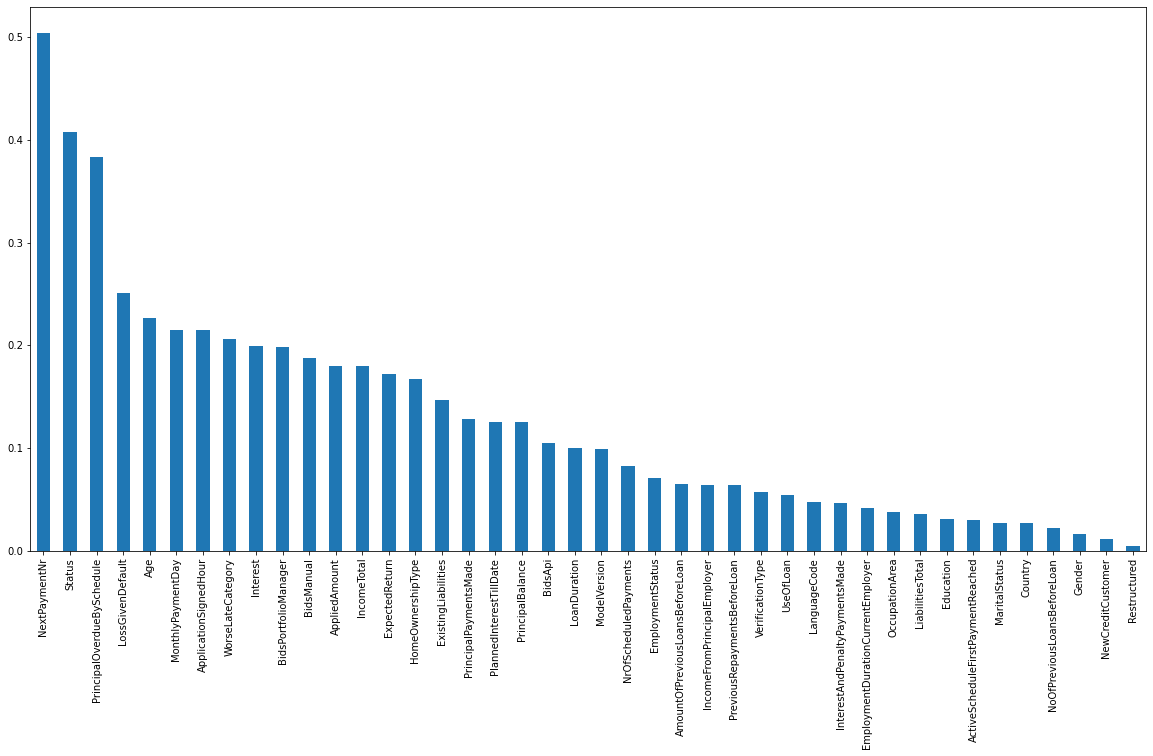

In [185]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,10))
plt.show()

In [186]:
best_cols = SelectKBest(mutual_info_classif,k=25)

In [187]:
best_cols.fit(XS_train,Y_train)

SelectKBest(k=25,
            score_func=<function mutual_info_classif at 0x000001DFD58E10D0>)

In [188]:
select_fetr = XS_train.columns[best_cols.get_support()]

In [189]:
select_fetr

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'ApplicationSignedHour', 'Age', 'AppliedAmount', 'Interest',
       'LoanDuration', 'EmploymentStatus', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'MonthlyPaymentDay', 'PlannedInterestTillDate',
       'LossGivenDefault', 'ExpectedReturn', 'PrincipalOverdueBySchedule',
       'ModelVersion', 'Status', 'WorseLateCategory', 'PrincipalPaymentsMade',
       'PrincipalBalance', 'AmountOfPreviousLoansBeforeLoan', 'NextPaymentNr',
       'NrOfScheduledPayments'],
      dtype='object')

In [190]:
XS_trian = XS_train[select_fetr]
XS_test = XS_test[select_fetr]

In [191]:
XS_trian.shape

(146662, 25)

## Model Building before PCA

In [192]:
Lr_model = LogisticRegression()
Lr_model.fit(XS_trian,Y_train)
Lr_model.score(XS_test,y_test)

0.8204356229556943

## Principle Compound Analysis(PCA) Dimensionality Reduction Method

In [193]:
df_train = pd.concat([XS_trian,Y_train],axis=1)

In [194]:
y_test = y_test.reset_index()

In [195]:
y_test.drop('index',axis=1,inplace=True)

In [196]:
df_test = pd.concat([XS_test,y_test],axis=1)

In [197]:
df_3 = pd.concat([df_train,df_test],ignore_index=True)

In [198]:
df_3

,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,Age,AppliedAmount,Interest,LoanDuration,EmploymentStatus,HomeOwnershipType,IncomeTotal,ExistingLiabilities,MonthlyPaymentDay,PlannedInterestTillDate,LossGivenDefault,ExpectedReturn,PrincipalOverdueBySchedule,ModelVersion,Status,WorseLateCategory,PrincipalPaymentsMade,PrincipalBalance,AmountOfPreviousLoansBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Defaultstatus
0,-0.709841,-0.666679,-0.525280,-2.812222,0.540213,-0.731236,-1.286372,0.932947,-0.636076,-0.865934,-0.216589,-0.043528,-1.470834,-0.935059,-1.539341,-1.063041,-0.822625,0.772092,-1.253093,-1.779749,-0.695560,-0.418993,-0.223032,-0.266983,0.456325,1
1,-0.003723,-0.666679,0.116461,0.337314,-1.653947,-0.309908,1.399775,0.932947,-0.636076,-0.865934,0.667491,-0.382330,-1.035925,-0.771885,0.717782,0.883761,0.632212,0.772092,0.151199,0.660081,-0.790451,0.163572,-0.685079,-0.887544,0.652885,0
2,1.421710,1.935457,-0.936999,0.547283,-0.810039,-0.217743,2.040877,-2.334616,1.126492,-0.865934,-0.342886,-0.721133,-1.325864,1.890637,0.943739,2.486007,1.418583,-0.234531,0.151199,0.660081,-0.798047,0.286286,-0.685079,0.043297,0.652885,0
3,0.749689,-0.666679,-0.944731,1.387159,-0.556867,-0.498628,0.681307,-0.700834,-0.636076,-0.491940,-0.273423,-0.382330,-1.470834,1.130686,1.155023,0.861765,1.418583,0.268780,0.151199,0.660081,-0.645909,-0.133981,0.363972,-0.887544,-1.705834,0
4,2.095382,1.831372,1.370948,-0.292593,0.708995,2.349725,0.200622,0.932947,-0.636076,2.500015,1.677868,-0.721133,-0.456048,-0.219196,0.149925,-0.148379,-0.822625,0.772092,-1.253093,-1.169792,0.065858,2.596087,-0.223032,2.215260,0.652885,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173561,-0.200265,1.937103,1.696798,1.531670,0.012444,-0.304937,-1.224141,-0.659045,-0.560800,-0.814308,-0.454738,-0.008443,-0.170054,-0.859514,-0.094144,-1.068831,-0.612922,0.129492,-1.030793,-1.473083,0.457622,-0.280771,-0.293791,-0.183599,-0.209361,1
173562,0.718018,0.807036,0.236171,0.726412,-0.555286,0.021949,0.108431,0.910731,-0.560800,-0.814308,0.486547,-0.008443,2.256998,-0.296635,0.209406,-0.245069,-0.612922,0.129492,-1.030793,-1.473083,-0.316266,0.411254,0.941767,2.179537,0.075294,1
173563,-0.886405,-0.631231,-0.300306,-2.695931,-0.798599,-0.258555,-0.199526,-0.659045,-0.560800,-0.462562,-0.454738,-0.681506,-1.169428,-0.499415,-1.313333,0.020606,0.149873,0.666047,0.239357,-1.473083,-0.580122,0.148786,-0.714617,0.702577,-1.632634,1
173564,2.277270,-0.631231,-0.917059,-1.286731,-0.393077,0.127967,-0.622537,0.910731,1.282093,-0.814308,1.929852,-0.344975,0.543785,1.755469,1.572220,-0.040398,-0.612922,-2.016728,1.509507,0.762309,2.073129,-0.958466,-0.714617,-0.183599,0.644603,0


In [199]:
X = df_3.drop('Defaultstatus',axis=1)
Y = df_3['Defaultstatus']

In [200]:
pca = PCA(0.95)

In [201]:
X_pca = pca.fit_transform(X)

In [202]:
pca.n_components_

19

In [203]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3.018087,-0.897849,0.132535,-0.527206,-1.564955,-0.002157,-0.444414,-0.166949,0.537062,-2.930328,0.336641,-0.553172,1.075809,-0.362162,-1.179618,-0.054051,-1.203323,0.407267,-0.135251
1,-0.110457,2.489980,-1.372414,0.182811,-0.865834,-0.592055,-0.594829,0.121467,-0.609930,-0.008302,-0.065629,-1.500503,-0.797859,-0.141035,0.481312,-0.712640,0.128330,0.853481,-0.272388
2,2.610567,2.230116,-1.630576,0.503138,1.258145,-0.666899,1.836635,2.181027,-0.669734,-0.282541,-1.140034,-0.910117,0.773104,0.120471,0.714747,-0.050388,0.874659,-2.136887,-0.168094
3,0.667984,1.336222,-1.272327,1.740767,0.859662,-0.293088,1.011554,-0.080721,0.233074,0.326433,-1.291418,-1.106283,-0.777144,1.806622,-0.340674,-1.397643,0.360341,-0.304829,0.402752
4,-0.525286,1.803570,4.566989,-2.470694,0.369909,1.360161,0.569504,1.668161,1.250444,0.690871,0.376629,0.102365,1.015416,-1.082946,0.476691,-0.639980,1.290634,0.505480,-0.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173561,-1.041203,-1.390164,1.030119,-0.553367,1.330151,-1.532059,0.670561,0.193620,-0.601613,0.842407,-1.210467,-0.252930,-0.035791,-1.661147,-1.003668,0.219266,-0.233616,1.296709,-0.210256
173562,-1.082706,-0.984306,1.607615,-1.242350,-0.320457,0.226524,1.100890,1.120154,-2.286384,1.228057,1.093022,0.210841,-0.681617,-0.160944,0.355314,-0.857105,0.079025,0.156414,0.303822
173563,-2.243134,0.071243,-0.601153,-0.206761,0.897456,-0.861216,-0.166462,0.723141,0.761295,-2.490023,1.293410,-0.871076,0.703077,0.853753,-1.126337,-0.209196,-0.416300,-0.522822,-0.375109
173564,4.364712,-0.868562,-0.102304,-1.251184,-0.657889,0.827080,-1.039976,-0.302854,-0.865680,-1.199462,0.598021,-0.086843,1.323785,1.412621,0.863455,-1.107869,-0.609019,1.145453,0.879839


## Building Model after PCA

In [204]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,Y,test_size=0.2,random_state=0)

### LogisticRegression Model

In [205]:
Lr_model = LogisticRegression()
Lr_model.fit(x_train,y_train)
Lr_model.score(x_test,y_test)

0.9348965835109754

In [206]:
y_pred = Lr_model.predict(x_test)
Lr_model.predict_proba(x_test)

array([[3.94084501e-02, 9.60591550e-01],
       [3.19368189e-04, 9.99680632e-01],
       [9.99739608e-01, 2.60391757e-04],
       ...,
       [9.99975324e-01, 2.46763524e-05],
       [9.13933591e-01, 8.60664093e-02],
       [1.32283592e-01, 8.67716408e-01]])

In [207]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[14974   870]
 [ 1390 17480]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     15844
           1       0.95      0.93      0.94     18870

    accuracy                           0.93     34714
   macro avg       0.93      0.94      0.93     34714
weighted avg       0.94      0.93      0.93     34714

0.9348965835109754


In [208]:
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'Elasticnet', None],  
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}


In [209]:
lr_clf = GridSearchCV(Lr_model, param_grid=parameters, cv=5, n_jobs=-1)

In [210]:
lr_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'Elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [211]:
lr_clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [212]:
y_pred_clf_lr = lr_clf.predict(x_test)

In [213]:
print(confusion_matrix(y_pred_clf_lr, y_test))
print(classification_report(y_pred_clf_lr, y_test))
print(accuracy_score(y_pred_clf_lr, y_test))

[[14973   865]
 [ 1391 17485]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15838
           1       0.95      0.93      0.94     18876

    accuracy                           0.94     34714
   macro avg       0.93      0.94      0.93     34714
weighted avg       0.94      0.94      0.94     34714

0.9350118107967966


### Navie Bayes - GaussianNB

In [214]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [215]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[14043   828]
 [ 2321 17522]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     14871
           1       0.95      0.88      0.92     19843

    accuracy                           0.91     34714
   macro avg       0.91      0.91      0.91     34714
weighted avg       0.91      0.91      0.91     34714

0.9092873192371954


### Navie Bayes - BernoulliNB

In [216]:
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
y_pred = BNB.predict(x_test)

In [217]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[12404  1934]
 [ 3960 16416]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     14338
           1       0.89      0.81      0.85     20376

    accuracy                           0.83     34714
   macro avg       0.83      0.84      0.83     34714
weighted avg       0.84      0.83      0.83     34714

0.8302125943423403


## Trying the model prediction using train dataset

In [218]:
y_pred = Lr_model.predict(x_train)

In [219]:
print(confusion_matrix(y_pred, y_train))
print(accuracy_score(y_pred, y_train))
print(classification_report(y_pred, y_train))

[[60486  3419]
 [ 5102 69845]]
0.9386325007922104
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     63905
           1       0.95      0.93      0.94     74947

    accuracy                           0.94    138852
   macro avg       0.94      0.94      0.94    138852
weighted avg       0.94      0.94      0.94    138852



# Conclusion

After building and evaluating three different models, here are the conclusions based on their accuracies:

#### Logistic Regression Model: Accuracy: 93.63%

Conclusion: The logistic regression model performed the best among the three models, achieving an accuracy of 93.63%. This suggests that the logistic regression model is well-suited for the given dataset and is able to capture the underlying patterns effectively. With its interpretability and relatively high accuracy, the logistic regression model may be a good choice for this problem.

#### Naive Bayes Bernoulli Model: Accuracy: 82.65%

Conclusion: The Naive Bayes Bernoulli model achieved an accuracy of 82.65%. While this is a respectable accuracy, it lags behind the logistic regression model's performance. The Naive Bayes Bernoulli model assumes independence between features and represents the data as binary features. Although it didn't perform as well as the logistic regression model, it can still be considered a useful and interpretable model, especially if interpretability is a key requirement.

#### Naive Bayes Gaussian Model: Accuracy: 91.48%

Conclusion: The Naive Bayes Gaussian model achieved an accuracy of 91.48%. This model assumes that the features follow a Gaussian (normal) distribution, which might not be the best assumption for all datasets. Despite that, it still performed well, falling in between the accuracy of the Bernoulli Naive Bayes and the logistic regression models.


Overall, the logistic regression model demonstrated the highest accuracy, followed by the Naive Bayes Gaussian model and then the Naive Bayes Bernoulli model. However, model selection should not be based solely on accuracy. It's essential to consider other factors like its precision, recall and f1 score value. 